In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## Preproccessing

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
column_data_types = df.dtypes

numerical_count = 0
categorical_count = 0
for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

print(f"{numerical_count} Columns are Numerical")
print(f"{categorical_count} Columns are Categorical")

26 Columns are Numerical
9 Columns are Categorical


In [7]:
df.select_dtypes(np.number).sample(5)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
888    35       1212                 8          2              1   
155    29       1496                 1          1              1   
1427   40        543                 1          4              1   
1446   34        704                28          3              1   
383    22        253                11          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
888             1243                        3          78               2   
155              208                        4          41               3   
1427            2012                        1          83               3   
1446            2035                        4          95               2   
383              511                        1          43               3   

      JobLevel  ...  RelationshipSatisfaction  StandardHours  \
888          3  ...                         2             80   
155          2  ...                         1             80   
1427         1  ...                         3             80   
1446         2  ...                         4             80   
383          1  ...                         4             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
888                  1                 16                      6   
155                  1                 10                      1   
1427                 2                  8                      3   
1446                 2                  8                      2   
383                  1                  2                      1   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
888                 2              13                   2   
155                 3              10                   7   
1427                2               1                   0   
1446                3               8                   7   
383                 3               2                   1   

      YearsSinceLastPromotion  YearsWithCurrManager  
888                         4                    12  
155                         0                     9  
1427                        0                     0  
1446                        1                     7  
383                         1                     2  

[5 rows x 26 columns]

In [8]:
df.select_dtypes(include='O').sample(5)

Attrition BusinessTravel              Department EducationField  Gender  \
425         No  Travel_Rarely  Research & Development  Life Sciences    Male   
308         No     Non-Travel  Research & Development  Life Sciences    Male   
74          No  Travel_Rarely  Research & Development  Life Sciences  Female   
1451        No  Travel_Rarely                   Sales  Life Sciences  Female   
192        Yes  Travel_Rarely  Research & Development  Life Sciences    Male   

                        JobRole MaritalStatus Over18 OverTime  
425                     Manager       Married      Y       No  
308   Healthcare Representative      Divorced      Y      Yes  
74        Laboratory Technician       Married      Y       No  
1451            Sales Executive       Married      Y       No  
192      Manufacturing Director       Married      Y      Yes

In [9]:
#check if there are duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
#The data is highly imbalanced
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
# drop columns that has no meaning in our analysis and prediction
cols = ["EmployeeCount", "EmployeeNumber"]
df.drop(columns=cols, inplace=True)

In [12]:
df.describe(include="O").T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [13]:
#from the above cell we can notice that all the employees are above 18 so we will drop this column
df.drop( columns = ['Over18'], inplace=True)

In [14]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [15]:
#from the above cell we can notice that all the StandardHours are 80 so we will also drop it
df.drop( columns = ['StandardHours'], inplace=True)

## Cat Columns Analysis

In [16]:
num_cols = df.select_dtypes(np.number).columns
new_data = df.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/3331673929.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})


In [17]:
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])
    f_scores[column] = f_score
    p_values[column] = p_value

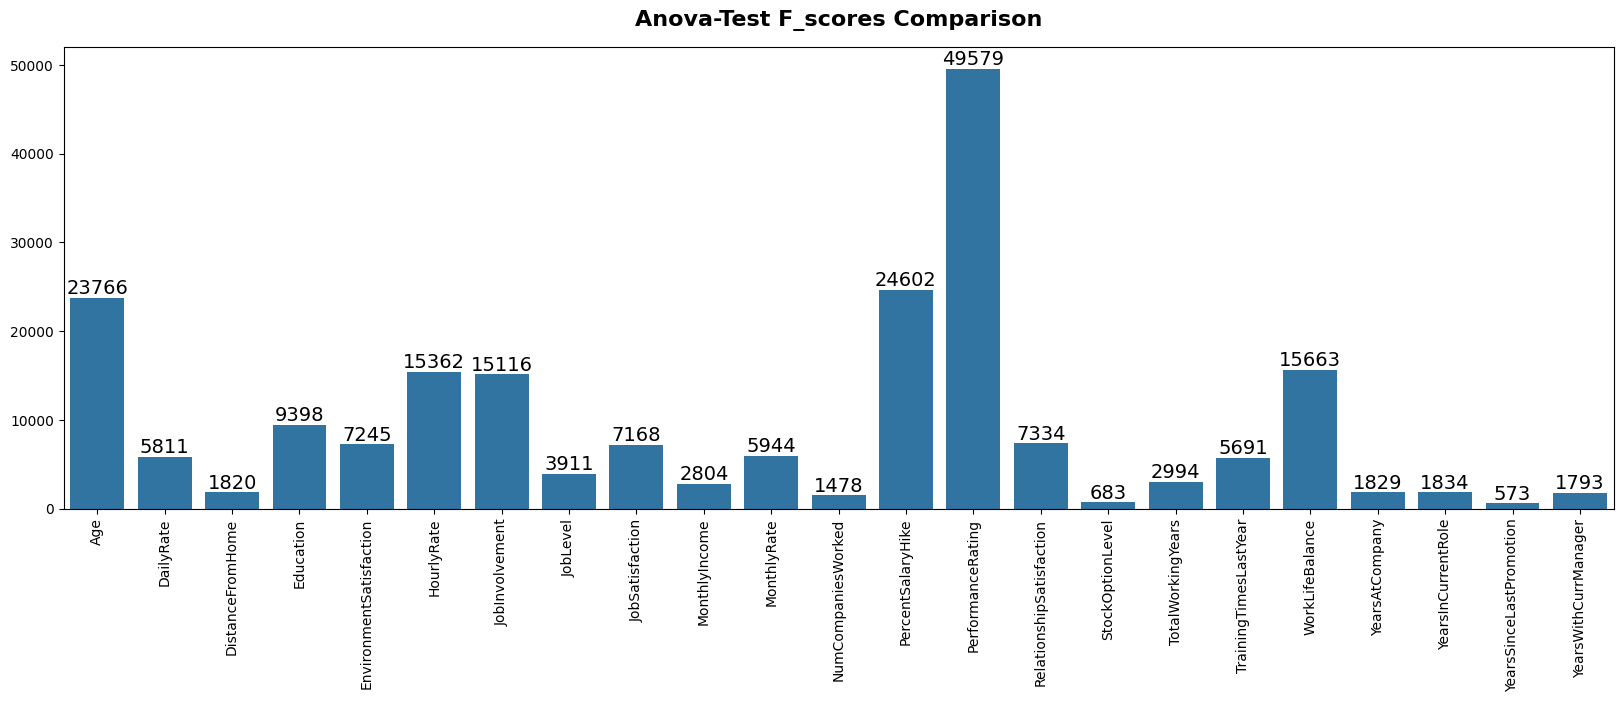

In [18]:
plt.figure(figsize=(20,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

In [19]:
# perform chis square test to analyze categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [20]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

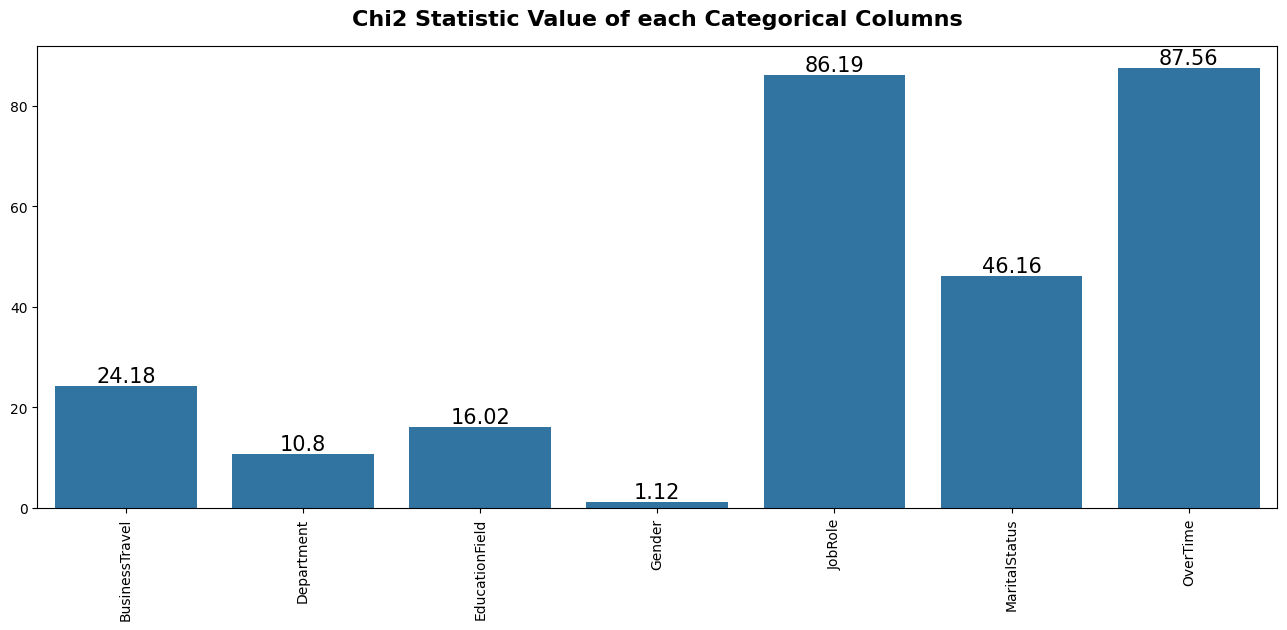

In [21]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [22]:
# df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

## EDA

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 50)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

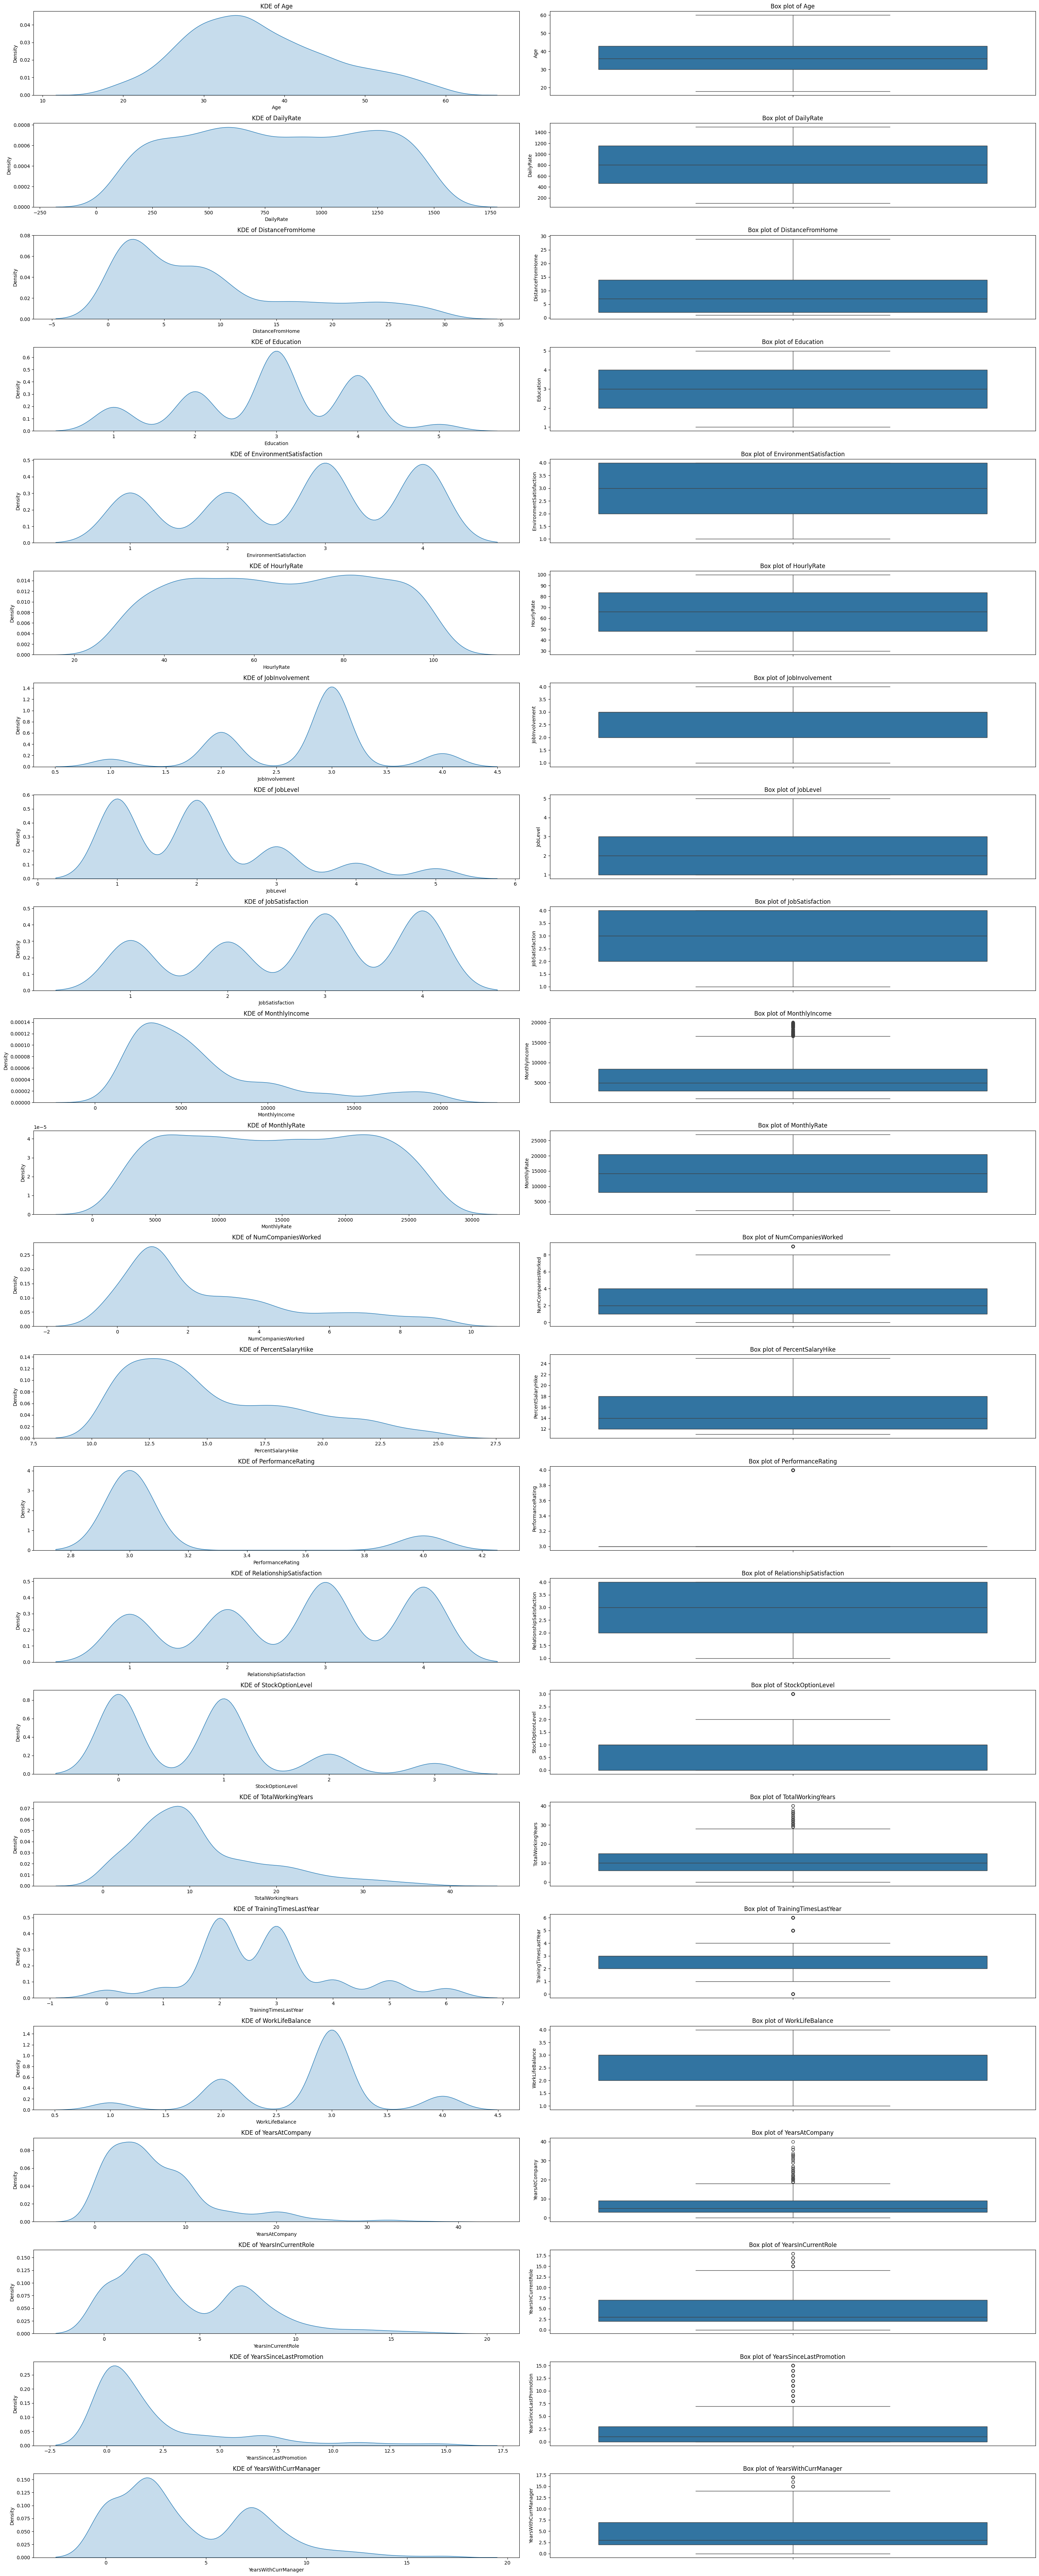

In [24]:
fig = plt.figure(figsize=(30, 80))  # Adjusted figure size for a taller layout
grid = plt.GridSpec(25, 2)

counter = 0

for col in df[num_cols]:
    # KDE plot
    kde_ax = fig.add_subplot(grid[counter, 0])
    sns.kdeplot(x=col, data=df, fill=True, ax=kde_ax)
    kde_ax.set_title(f'KDE of {col}')
    
    # Box plot
    box_ax = fig.add_subplot(grid[counter, 1])
    sns.boxplot(data=df[col], ax=box_ax)
    box_ax.set_title(f'Box plot of {col}')
    
    counter += 1
plt.tight_layout()
plt.show()

### Attrition Column

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/569308069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = attrition_rate.index, y = attrition_rate.values, palette={'Yes': 'red', 'No': 'green'})


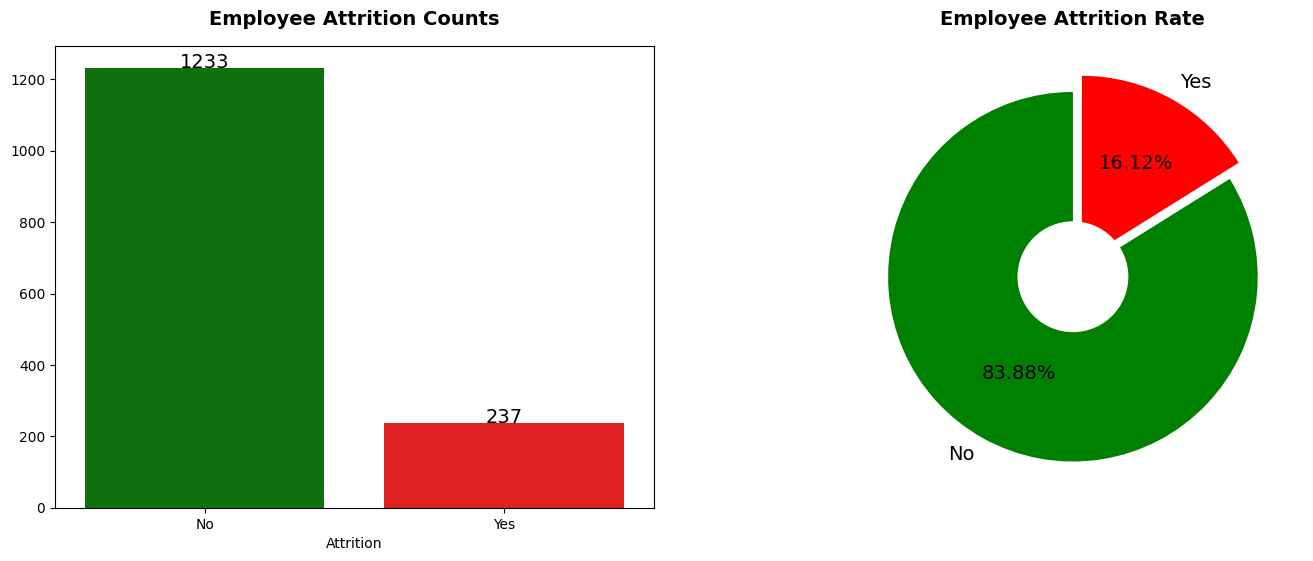

In [25]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x = attrition_rate.index, y = attrition_rate.values, palette={'Yes': 'red', 'No': 'green'})
plt.title("Employee Attrition Counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette(['green', 'red'], len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

- no attirition is significantly higher, most people in the company don't want to leave

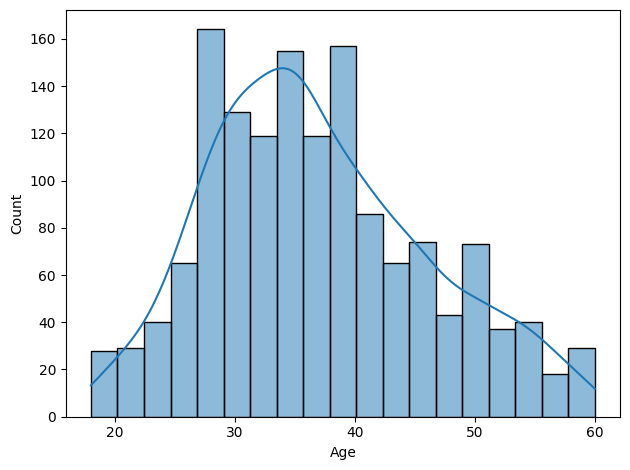

In [26]:
#seeing employee age and count
sns.histplot(data=df, x='Age', kde=True)
plt.tight_layout()
plt.show()

## Questions to Answer

1.	What are the key factors contributing to employee attrition?
2.	How does MonthlyIncome vary across different departments and JobRole?
3.	Is there a correlation between YearsAtCompany and Attrition?
4.	How does StockOption differ by JobRole?
5.	What is the impact of OverTime on employee performance (PerformanceRating)?
6.	Are there any patterns in Attrition based on BusinessTravel frequency?
7.	Which job roles have the highest average YearsAtCompany?
8.	Is there a relationship between EducationField and PerformanceRating?
9.	How does DistanceFromHome influence employee attrition?

### Q1.	What are the key factors contributing to employee attrition?

In [27]:
fig = px.histogram(df, x='JobRole', color='Attrition', barmode='group',
             facet_col='OverTime', facet_row='WorkLifeBalance', text_auto=True, color_discrete_sequence=["red", "green"],
             title="Attrition by Job Role, OverTime, and Work-Life Balance")
fig.update_layout(xaxis_title='Job Role', yaxis_title='Count', height=800)
fig.show()

- Employees who workes OverTime as Reasearch Scientist, Lab Tech and Sales Executive tend to leave the company even if they have better worklife Balance

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/1885292274.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




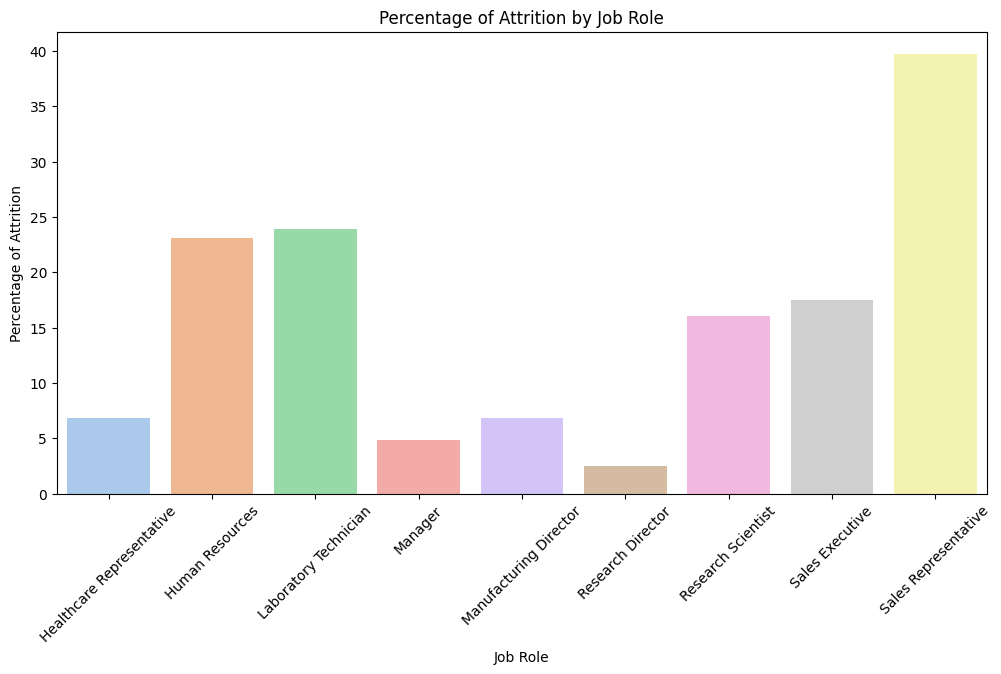

In [28]:
attrition_by_role = df[df['Attrition'] == 'Yes'].groupby('JobRole').size() / df.groupby('JobRole').size() * 100

attrition_by_role = attrition_by_role.reset_index()
attrition_by_role.columns = ['JobRole', 'Attrition (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='Attrition (%)', data=attrition_by_role, palette='pastel')
plt.xlabel('Job Role')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Job Role')
plt.xticks(rotation=45) 
plt.show()


- sales have the highest attrition, maybe because sales have higher work preasure than most. while next is human resources and laboratory techncian

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/1853510110.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




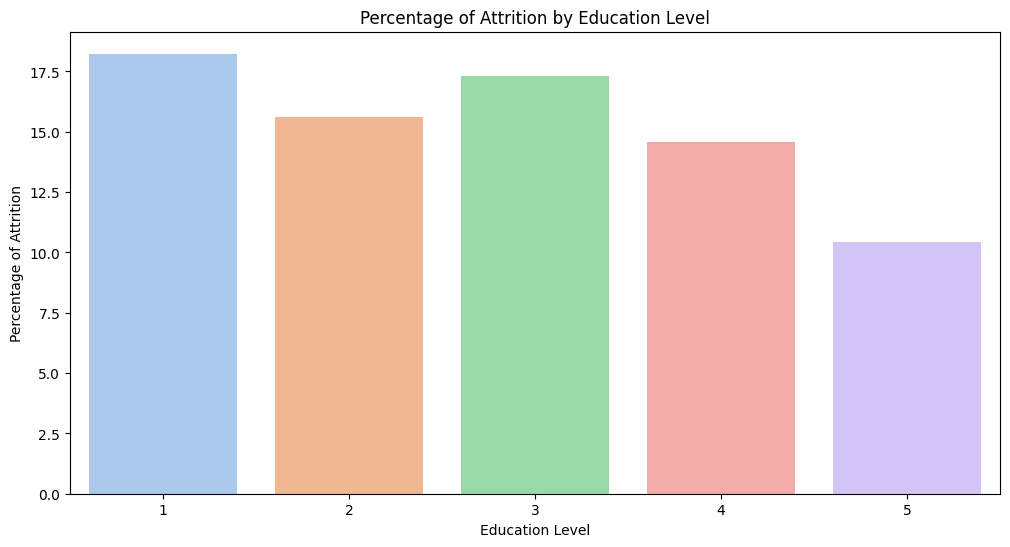

In [29]:
attrition_by_education = df[df['Attrition'] == 'Yes'].groupby('Education').size() / df.groupby('Education').size() * 100

attrition_by_education = attrition_by_education.reset_index()
attrition_by_education.columns = ['Education', 'Attrition (%)']
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Attrition (%)', data=attrition_by_education, palette='pastel')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Education Level')
plt.show()


as the education gets higher the rate lowers, doctors have the least while Below College have the higher. maybe Higher-educated employees might be more likely to find job roles that align well with their career goals

### Q2. How does MonthlyIncome vary across different departments and Job Roles?

In [30]:
fig = px.histogram(df, x='Department', y='MonthlyIncome', color='Department',
             title="Average Monthly Income Across Different Departments",histfunc='avg' )
fig.update_layout(xaxis_title='Department', yaxis_title='Monthly Income')
fig.show()

- All Departements nearly have the same avg montly income of about 7k
    - First is Sales with 6.96k
    - Second is HR with 6.66k
    - Third is Research & Development with 6.28k

In [31]:
fig = px.histogram(df, y='MonthlyIncome', x='JobRole', color='Department',
             title="Average Monthly Income Across Different Job Roles", histfunc='avg', barmode='group')
fig.update_layout(xaxis_title='Job Role', yaxis_title='MonthlyIncome', height=600)
fig.show()

- Avg Monthly income for maganers in different jobroles and departments are above 17k
- Avg Monthly income for HRs are 4.24k
- for Sales Executive are 6.9k while Rep. 2.6k

### Q3. Is there a correlation between YearsAtCompany and Attrition?

In [32]:
# Group by YearsAtCompany and Attrition, then count occurrences
count_df = df.groupby(["YearsAtCompany", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each YearsAtCompany
total_counts = df.groupby('YearsAtCompany').size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="YearsAtCompany")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df, 
    x="YearsAtCompany", 
    y='Percentage', 
    color='Attrition', 
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Line Plot of YearsAtCompany Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="YearsAtCompany",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/3576101202.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




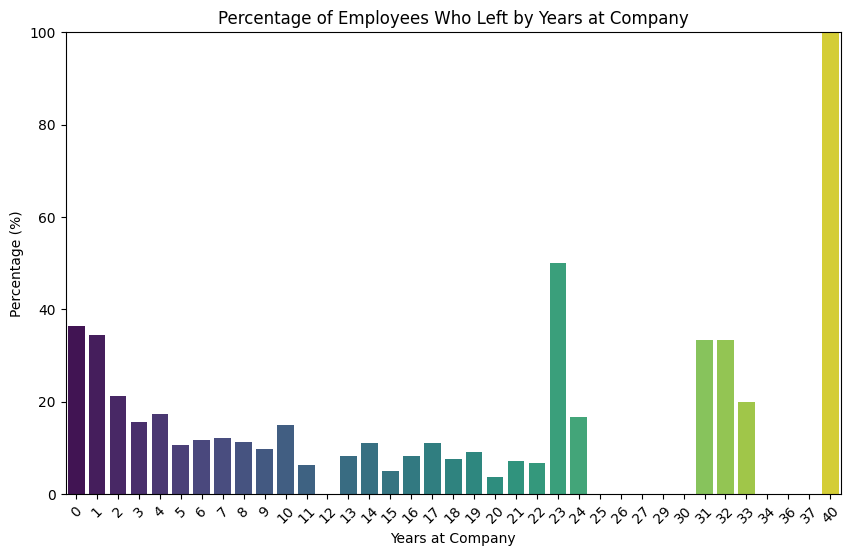

In [33]:
df_left = df[df['Attrition'] == 'Yes']

# Count the total number of employees and the number of employees who left for each year
total_counts = df.groupby('YearsAtCompany').size()
left_counts = df_left.groupby('YearsAtCompany').size()

# Calculate percentages
percentages = (left_counts / total_counts * 100).fillna(0).reset_index(name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='YearsAtCompany', y='Percentage', palette='viridis')

# Customizing the plot
plt.title('Percentage of Employees Who Left by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
plt.show()


- new employees tend to stay more than employees who have been wokring for a long time except for the first two years as 40% leave in there first two years. 

<Figure size 1000x600 with 0 Axes>

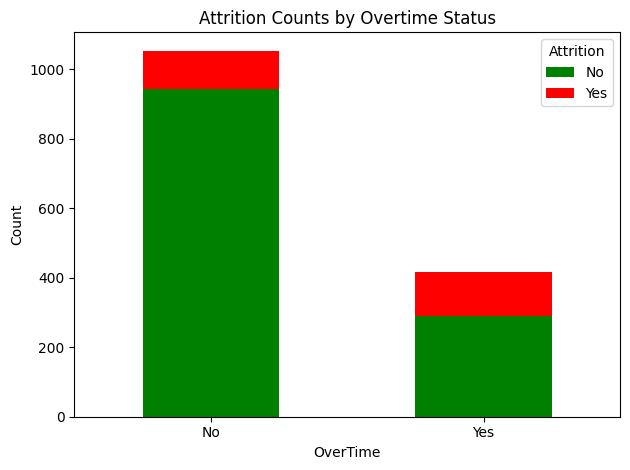

In [34]:
attrition_counts = df.groupby(['OverTime', 'Attrition']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
attrition_counts.plot(kind='bar', stacked=True, color={'Yes': 'red', 'No': 'green'})
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Attrition Counts by Overtime Status')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout();
plt.show();


- 30% of Employees who work overtime tend to leave the company

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/1975138634.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




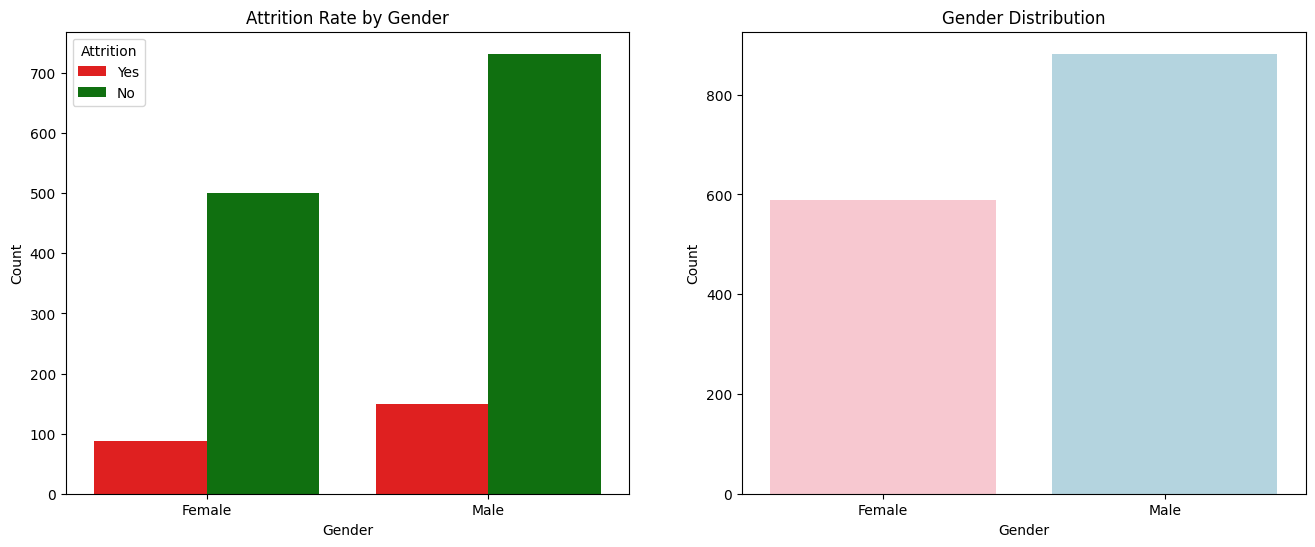

In [35]:
#seeing attrition by gender
attrition_palette = {'Yes': 'red', 'No': 'green'}
gender_palette = {'Male': 'lightblue', 'Female': 'pink'}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=df, palette=attrition_palette, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Attrition Rate by Gender')

#Count of Male and Female Employees
sns.countplot(x='Gender', data=df, palette=gender_palette, ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender Distribution')

plt.show()

- male tend to have more attrition but thats just due to there being more than female.
- overall male leave 16% while female leave 14%. so gender has no effect

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/2004884461.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




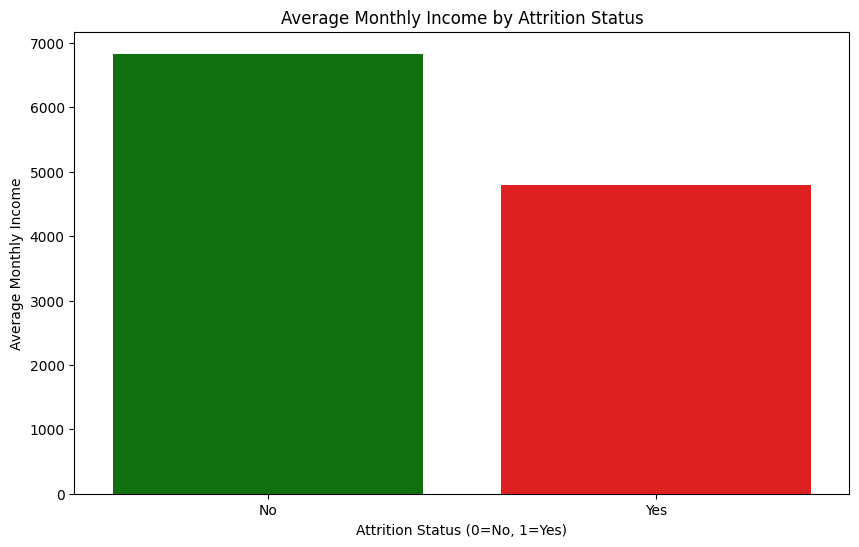

In [36]:
average_income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='MonthlyIncome', data=average_income_by_attrition, palette={'Yes': 'red', 'No': 'green'})
plt.title('Average Monthly Income by Attrition Status')
plt.xlabel('Attrition Status (0=No, 1=Yes)')
plt.ylabel('Average Monthly Income')
plt.show()

- average monthly income by attrition, people that are paid lower are more likely to leave

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/380580998.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




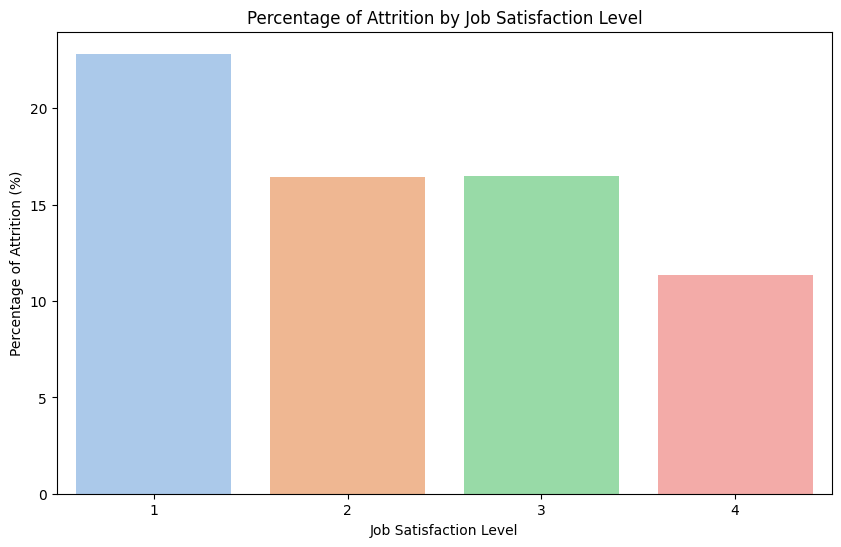

In [37]:
attrition_by_satisfaction = df[df['Attrition'] == 'Yes'].groupby('JobSatisfaction').size() / df.groupby('JobSatisfaction').size() * 100
attrition_by_satisfaction = attrition_by_satisfaction.reset_index()
attrition_by_satisfaction.columns = ['JobSatisfaction', 'Attrition (%)']

plt.figure(figsize=(10, 6))
sns.barplot(x='JobSatisfaction', y='Attrition (%)', data=attrition_by_satisfaction, palette='pastel')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Percentage of Attrition (%)')
plt.title('Percentage of Attrition by Job Satisfaction Level')
plt.show()


- Less job satisfaction means more people leaving

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/1475576049.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




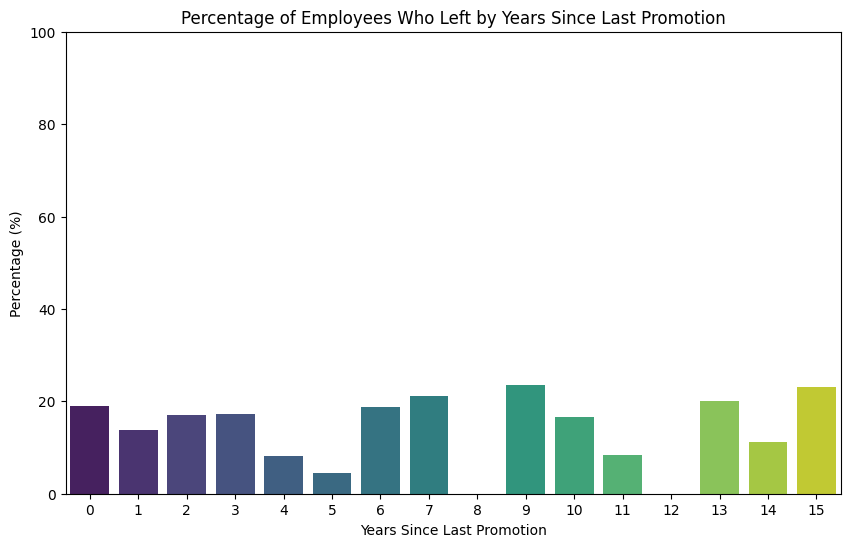

In [38]:
# Filter for employees who have left the company
df_left = df[df['Attrition'] == 'Yes']
total_counts = df.groupby('YearsSinceLastPromotion').size()
left_counts = df_left.groupby('YearsSinceLastPromotion').size()
percentages = (left_counts / total_counts * 100).fillna(0).reset_index(name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='YearsSinceLastPromotion', y='Percentage', palette='viridis')
plt.title('Percentage of Employees Who Left by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
plt.show()


- promotion seems to have no pattern and no effect on leaving

### Q4. How does StockOption differ by JobRole?

In [39]:
fig = px.histogram(df, y='JobRole', x='StockOptionLevel', color='StockOptionLevel', histfunc="count",
             title="Stock Option Level by Job Role", text_auto=True)
fig.update_layout(xaxis_title='Stock Option Level', yaxis_title='Job Role')
fig.show()

- Sales Executive, Lab Technician and Research Scientist have the highest percentages in stock option levels (1,2,3)

### Q5. What is the impact of OverTime on employee performance (PerformanceRating)?

In [40]:
fig = px.histogram(df, x='OverTime', y='PerformanceRating', color='PerformanceRating', histfunc="count",
             title="Performance Rating by OverTime")
fig.update_layout(xaxis_title='OverTime', yaxis_title='Performance Rating')
fig.show()

- There is no impact nearly on performance rating of employees as they with overtime and rating excellent(3) or outstanding(4) nearly the same percentage 28%

### Q6. Are there any patterns in Attrition based on BusinessTravel frequency?

In [41]:
fig = px.histogram(df, x='BusinessTravel', color="Attrition", color_discrete_map={"Yes":"red", "No":"green"}, barmode='group',
             title="Attrition by Business Travel Frequency", text_auto=True)
fig.update_layout(xaxis_title='Business Travel', yaxis_title='Count')
fig.show()

- Employees who travels frequently on buissness travels tend to leave the company with 25% of them

### Q7. Which job roles have the highest average YearsAtCompany?

In [42]:
fig = px.histogram(df, x='JobRole', y='YearsAtCompany', color='JobRole',
             title="Average Years at Company by Job Role",histfunc="avg",
             labels={'YearsAtCompany': 'Average Years at Company'})
fig.update_layout(xaxis_title='Job Role', yaxis_title='Average Years at Company')
fig.show()

- Managers and Directors have highest avg years at company with 14.5 years and 11 years in order

### Q8. Is there a relationship between EducationField and MonthlyIncome?

In [43]:
fig = px.histogram(df, x='EducationField', y='MonthlyIncome', color='EducationField', histfunc="avg",
             title="Monthly Income by Education Field")
fig.update_layout(xaxis_title='Education Field', yaxis_title='Monthly Income')
fig.show()

- Employees with Marketing background are the highest with avg monthly income 7.35k and nearly same with HR education field with 7.24k

### Q9. How does DistanceFromHome influence employee attrition?

In [44]:
# Group by JobLevel and Attrition, then count occurrences
count_df = df.groupby(["DistanceFromHome", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each JobLevel
total_counts = df.groupby("DistanceFromHome").size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="DistanceFromHome")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df, 
    x="DistanceFromHome", 
    y='Percentage', 
    color='Attrition', 
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Line Plot of DistanceFromHome Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="DistanceFromHome",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

- as distance from home increases, the percentage of attrition increases being at its atmost level when distance is larger than 10, espicially between 21-25 with 25%
    - distance from 5-10, the employees attrition percentage is 14.6%
    - 11-15, percentage is 21.7%
    - 16-20, percentage is 18.4%

### Q10. How does Age affect Attrition?

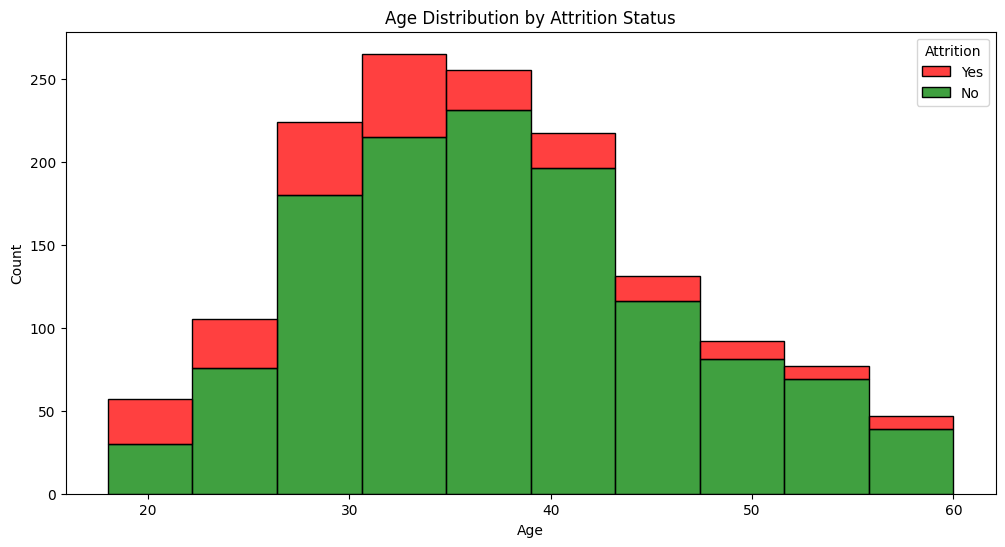

In [45]:
#attrition in all ages
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette={'Yes': 'red', 'No': 'green'}, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Attrition Status')
plt.show()

In [46]:
# Group by Age and Attrition, then count occurrences
count_df = df.groupby(['Age', 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each Age
total_counts = df.groupby('Age').size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on='Age')
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

fig = px.line(
    count_df, 
    x="Age", 
    y='Percentage', 
    color='Attrition', 
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Age Grouped by Attrition')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified")

# Show plot
fig.show()

- most employees are between age 25-40
- most people with high attrition are between 25-35
- old employees have a low attrition rate probably because its hard to find a job at that age

In [47]:
# Group by JobLevel and Attrition, then count occurrences
count_df = df.groupby(["DistanceFromHome", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each JobLevel
total_counts = df.groupby("DistanceFromHome").size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="DistanceFromHome")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df, 
    x="DistanceFromHome", 
    y='Percentage', 
    color='Attrition', 
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage of DistanceFromHome Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="DistanceFromHome",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

- as distance from home increases, the percentage of attrition increases being at its atmost level when distance is larger than 10, espicially between 21-25 with 25%
    - distance from 5-10, the employees attrition percentage is 14.6%
    - 11-15, percentage is 21.7%
    - 16-20, percentage is 18.4%

## High Correlated Features

In [67]:
df1 = df.copy()

In [68]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

df1["Attrition"] = le.fit_transform(df1['Attrition'])

In [69]:
encoder = OneHotEncoder()

encoded = encoder.fit_transform(df1[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Gender',
 'OverTime']])

In [70]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

df1 = pd.concat([df1, encoded_df],axis=1)
df1 = df1.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Gender',
 'OverTime'],axis =1)


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   HourlyRate                         1470 non-null   int64  
 7   JobInvolvement                     1470 non-null   int64  
 8   JobLevel                           1470 non-null   int64  
 9   JobSatisfaction                    1470 non-null   int64  
 10  MonthlyIncome                      1470 non-null   int64  
 11  MonthlyRate                        1470 non-null   int64

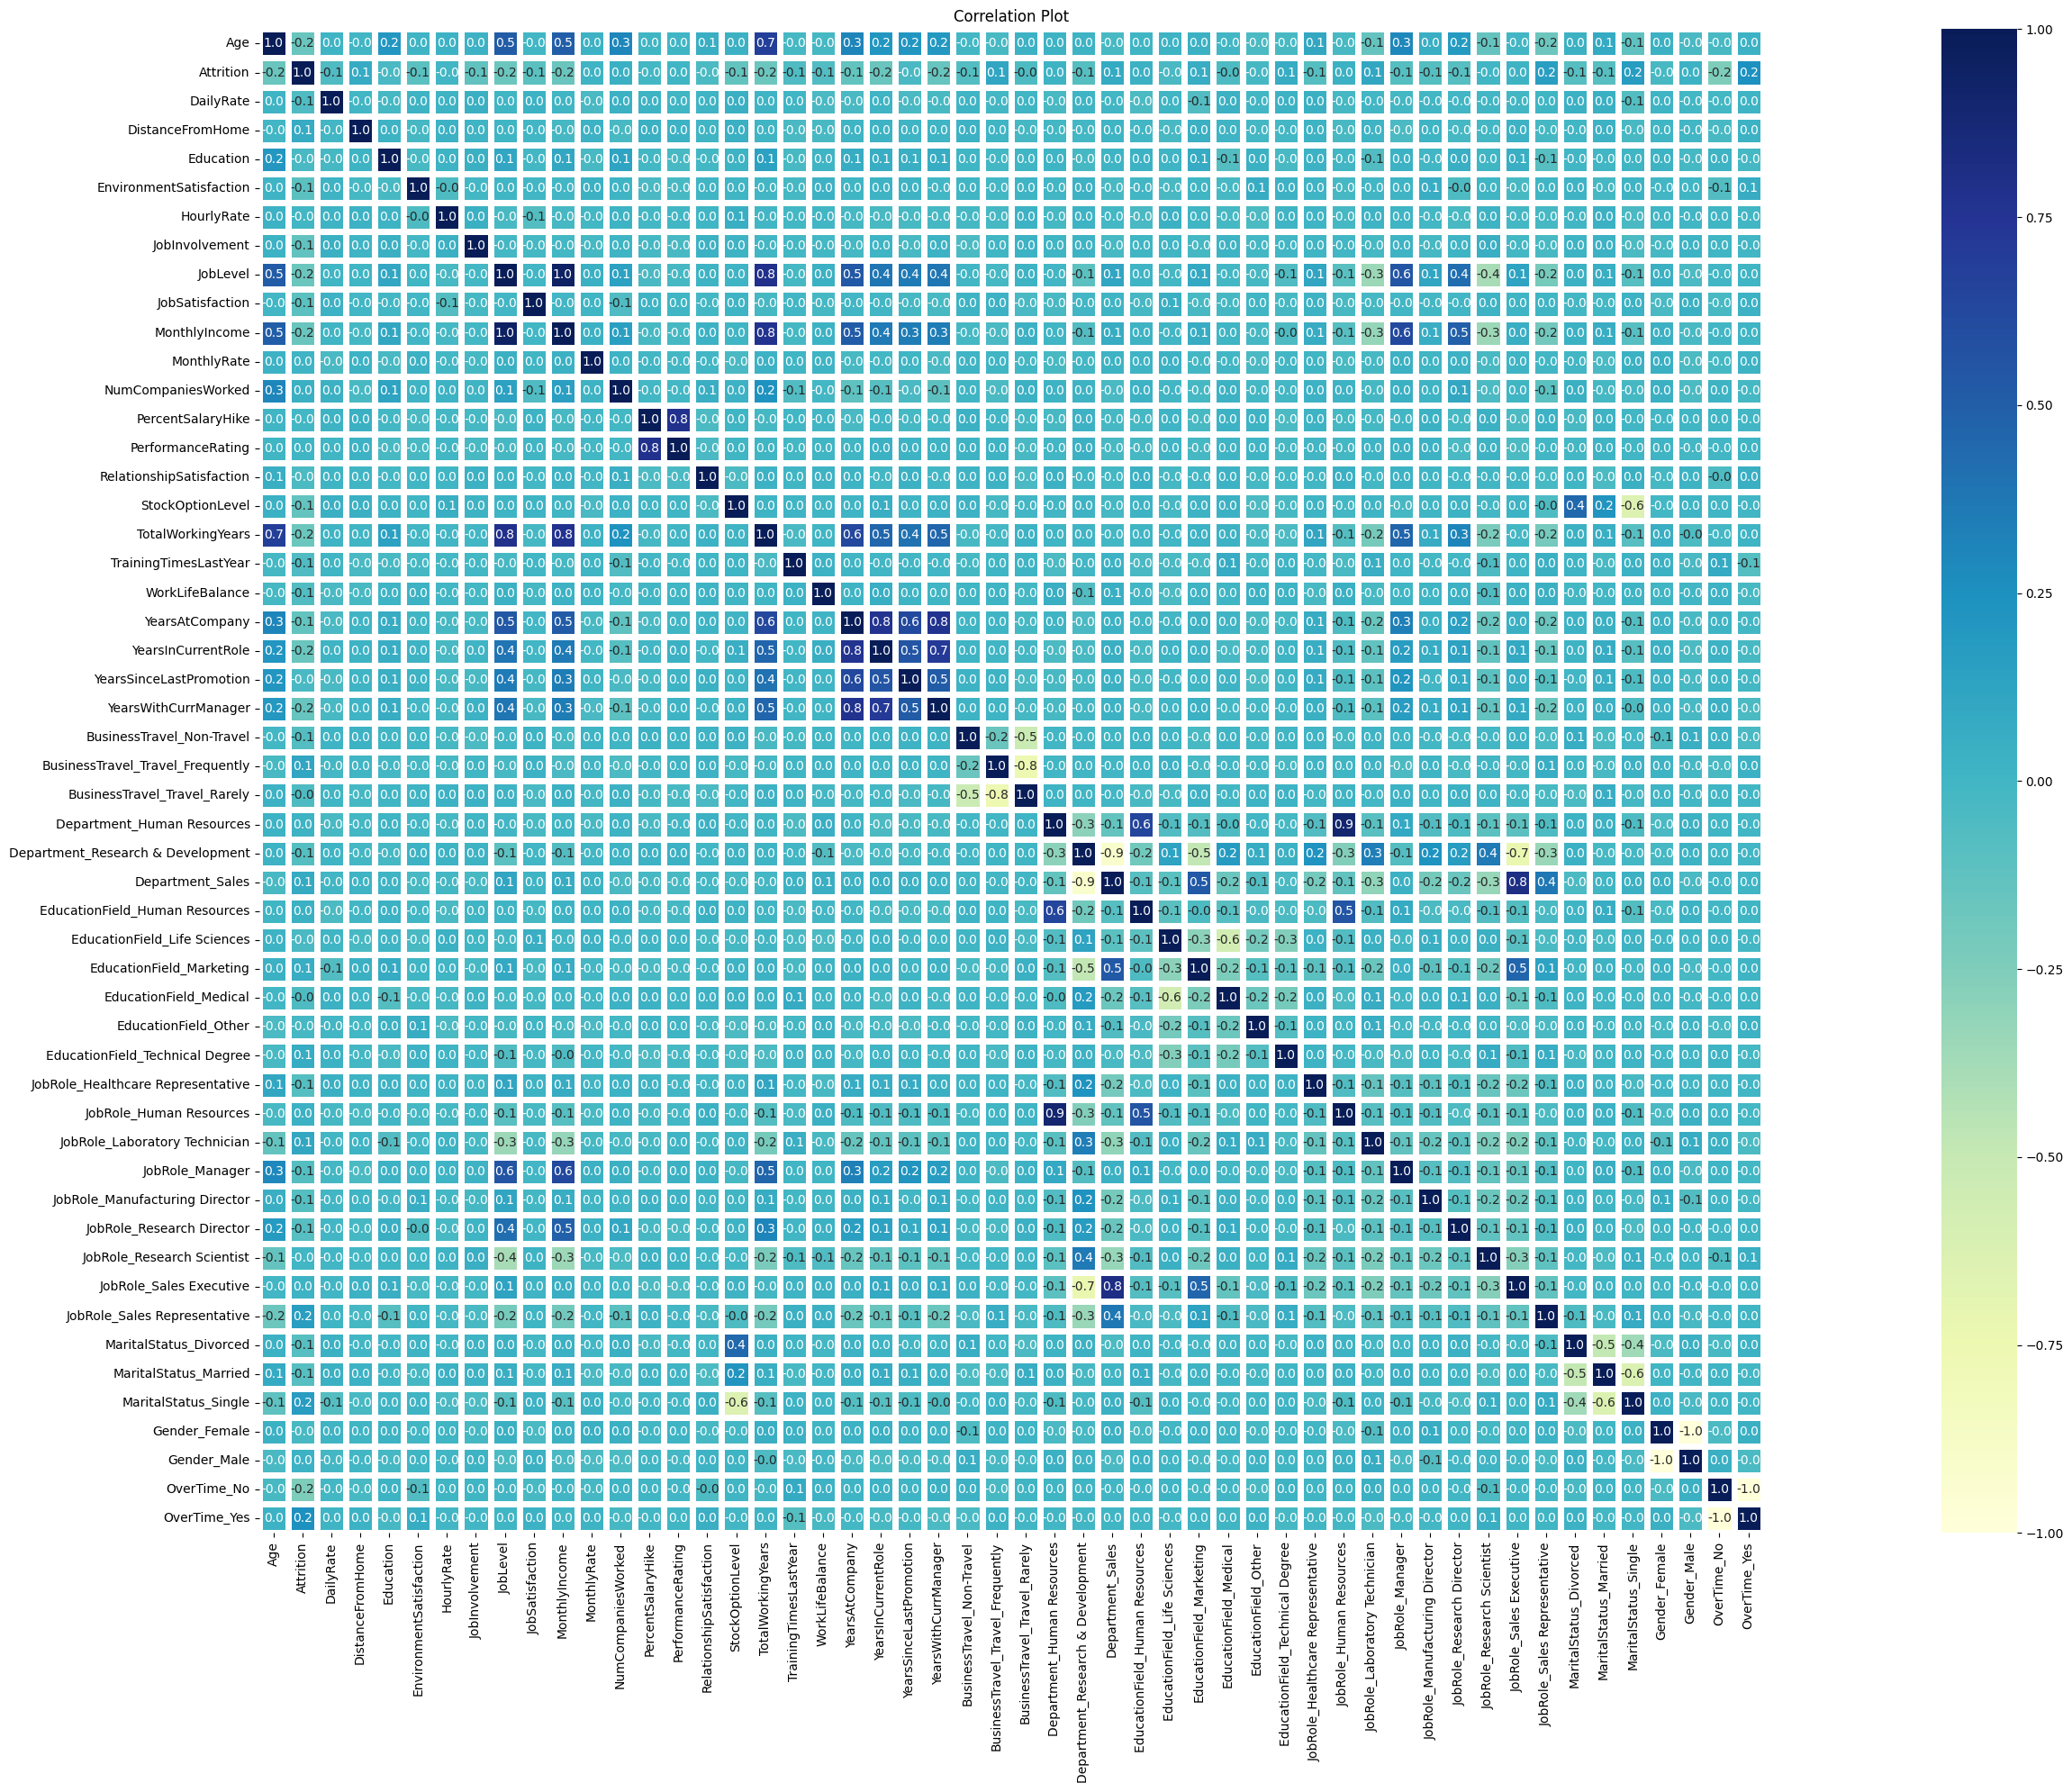

In [71]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df1.corr(),linewidths=5, annot=True, square=True,cmap='YlGnBu', fmt=".1f")
plt.tight_layout()
plt.show()

In [72]:
correlation_matrix = df1.corr()
high_correlation_mask = correlation_matrix >= 0.75
highly_correlated_features = []


for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
Department_Human Resources and JobRole_Human Resources
Department_Sales and JobRole_Sales Executive


In [73]:
# droping columns which are highly correlated
cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df1.drop(columns=cols, inplace=True)

## Feature Engineering

In [74]:
df_corr = df.copy()
df_corr["Attrition"] = df_corr["Attrition"].replace({"No":0, "Yes":1})
df_corr["Satisfaction"] = (0.1*df_corr["EnvironmentSatisfaction"]) + (0.1*df_corr["JobSatisfaction"]) + (0.05*df_corr["RelationshipSatisfaction"])
# df_corr["IncomeRate"] = (0.06*df_corr["DailyRate"]) + (0.01*df_corr["HourlyRate"]) + (0.02*df_corr["MonthlyRate"])
df_corr["EmployeeExperience"] = round(((0.13*df_corr["YearsAtCompany"]) + (0.16*df_corr["YearsInCurrentRole"]) + (0.03*df_corr["YearsSinceLastPromotion"]) + (0.16*df_corr["YearsWithCurrManager"])),1)
num_corr = [col for col in df_corr.columns if df_corr[col].dtype != "object"]

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/4111753718.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



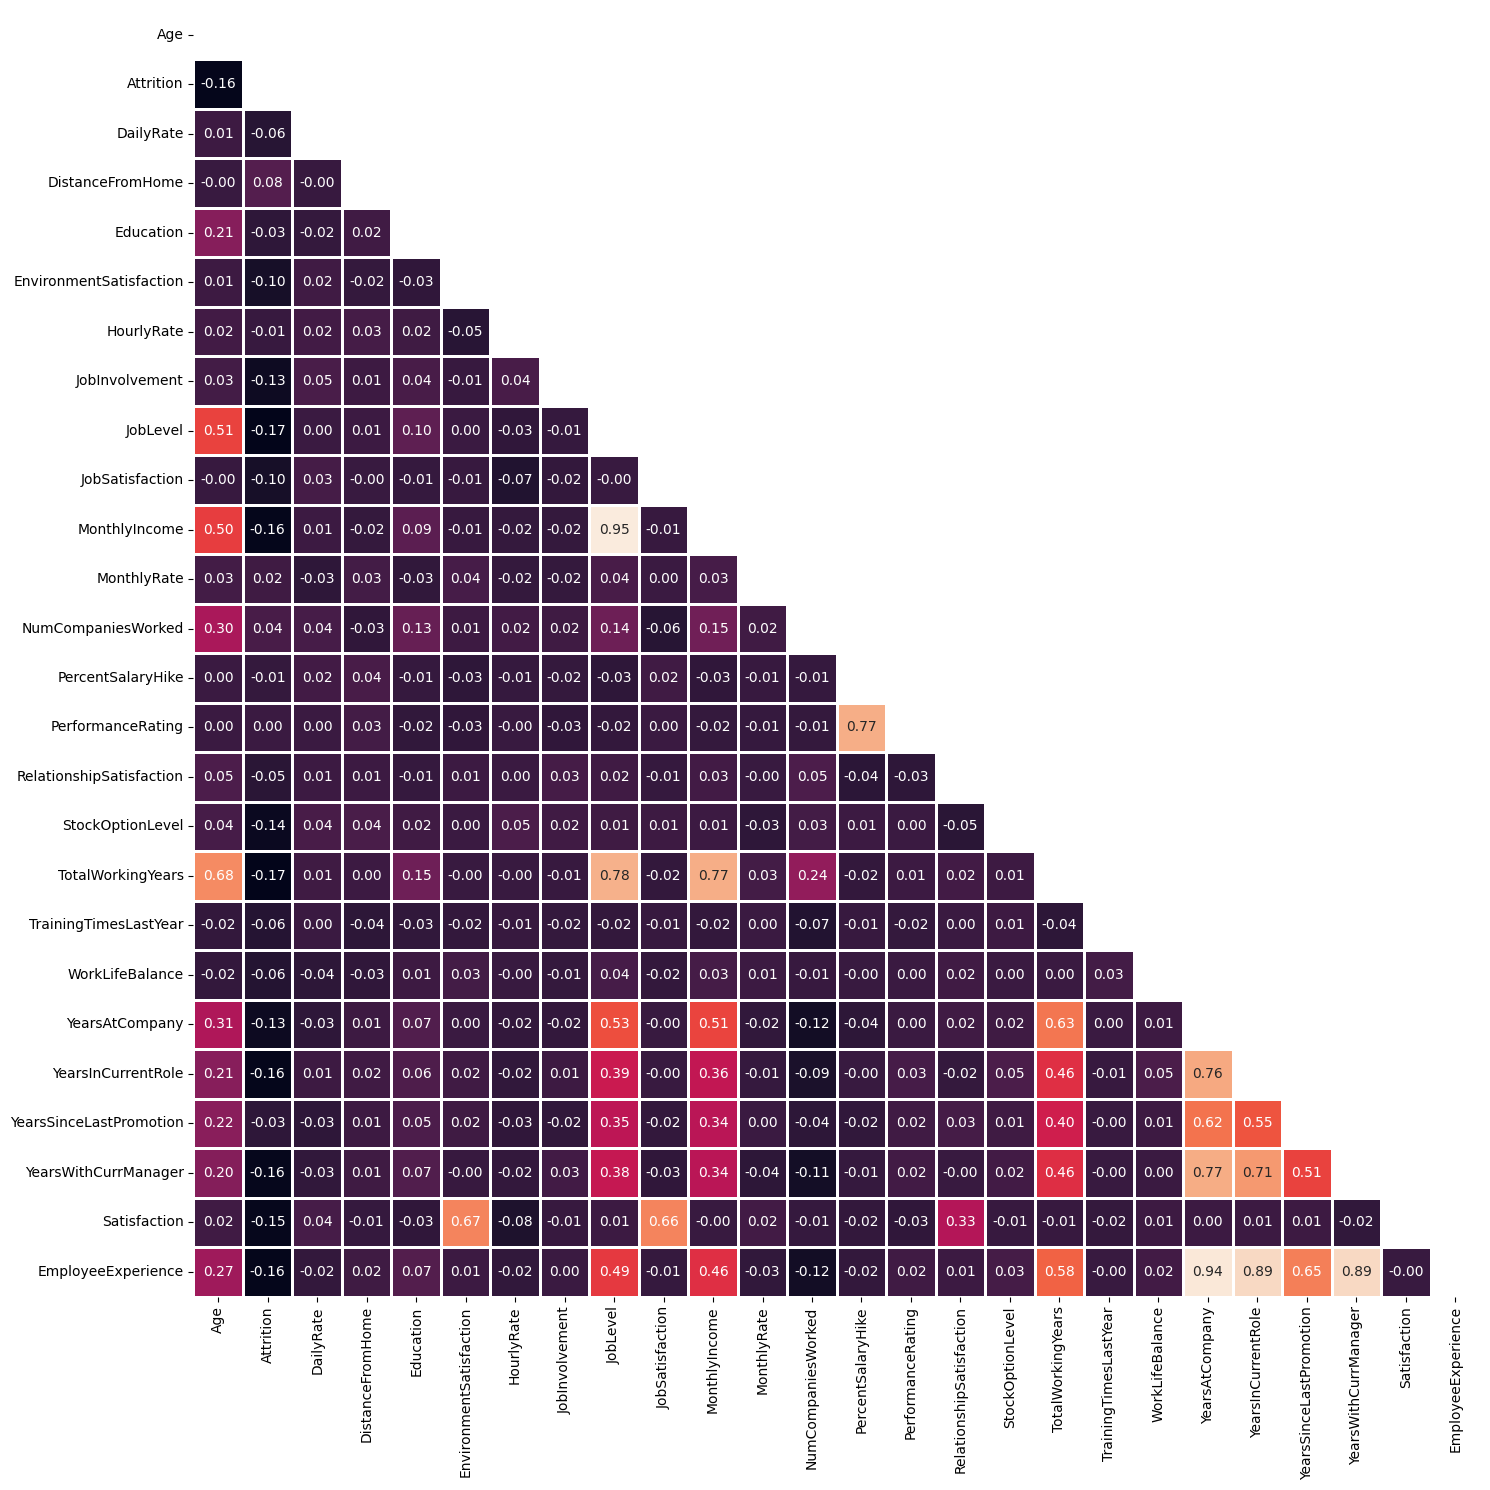

In [75]:
# Create a mask for the upper triangle (True means the cell will be hidden)
mask = np.triu(np.ones_like(df_corr[num_corr].corr(), dtype=bool))

plt.figure(figsize=(15,15))
sns.heatmap(df_corr[num_corr].corr(),mask = mask, fmt='.2f', annot=True, linewidths=2, square=True, cbar=False)
plt.tight_layout()
plt.show()

In [76]:
df["Satisfaction"] = (0.1*df["EnvironmentSatisfaction"]) + (0.1*df["JobSatisfaction"]) + (0.05*df["RelationshipSatisfaction"])
df["EmployeeExperience"] = round(((0.13*df["YearsAtCompany"]) + (0.16*df["YearsInCurrentRole"]) + (0.03*df["YearsSinceLastPromotion"]) + (0.16*df["YearsWithCurrManager"])),1)

In [77]:
df = df.drop(columns=["EnvironmentSatisfaction", "JobSatisfaction", "RelationshipSatisfaction",
                     "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager"])

In [78]:
df_cpy = df.copy()

In [79]:
df_cpy["Attrition"] = df_cpy["Attrition"].replace({"No":0, "Yes":1})
num_cpy = [col for col in df_cpy.columns if df_cpy[col].dtype != "object"]

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_1608/2209738165.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



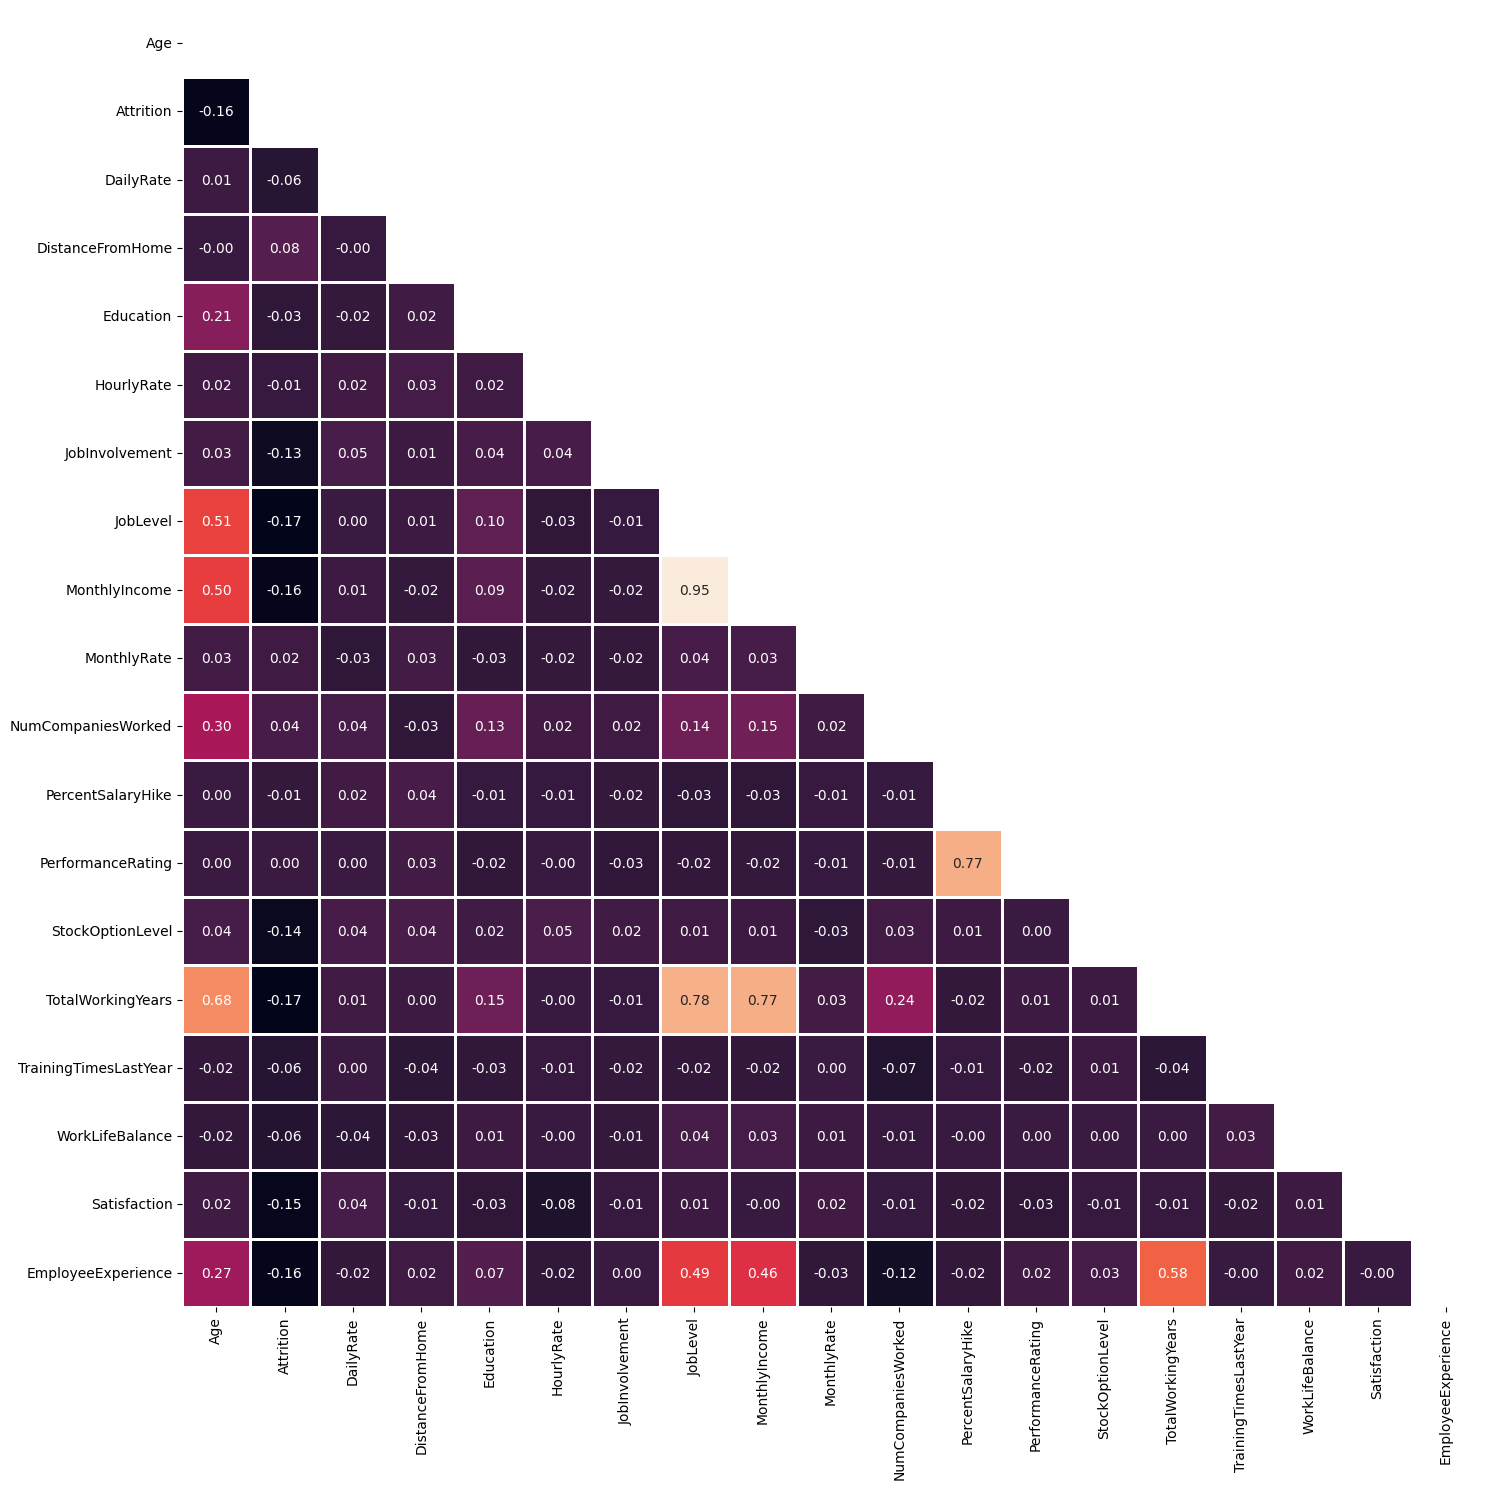

In [80]:
# Create a mask for the upper triangle (True means the cell will be hidden)
mask = np.triu(np.ones_like(df_cpy[num_cpy].corr(), dtype=bool))

plt.figure(figsize=(15,15))
sns.heatmap(df_cpy[num_cpy].corr(),mask = mask, fmt='.2f', annot=True, linewidths=2, square=True, cbar=False)
plt.tight_layout()
plt.show()

# Modeling

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay,classification_report

In [82]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'Satisfaction', 'EmployeeExperience'],
      dtype='object')

In [83]:
df_model = df[["Age","Attrition", 'BusinessTravel', 'JobInvolvement', 'JobRole', "MonthlyIncome", "MaritalStatus", 'StockOptionLevel',
       'TotalWorkingYears', "Satisfaction", "EmployeeExperience", "OverTime"]]

# df_model = df

In [84]:
df_model.head()

Age Attrition     BusinessTravel  JobInvolvement                JobRole  \
0   41       Yes      Travel_Rarely               3        Sales Executive   
1   49        No  Travel_Frequently               2     Research Scientist   
2   37       Yes      Travel_Rarely               2  Laboratory Technician   
3   33        No  Travel_Frequently               3     Research Scientist   
4   27        No      Travel_Rarely               3  Laboratory Technician   

   MonthlyIncome MaritalStatus  StockOptionLevel  TotalWorkingYears  \
0           5993        Single                 0                  8   
1           5130       Married                 1                 10   
2           2090        Single                 0                  7   
3           2909       Married                 0                  8   
4           3468       Married                 1                  6   

   Satisfaction  EmployeeExperience OverTime  
0          0.65                 2.2      Yes  
1          0.70                 3.6       No  
2          0.80                 0.0      Yes  
3          0.85                 2.2      Yes  
4          0.50                 1.0       No

In [85]:
X = df_model.drop(columns = ["Attrition"])
y = df_model["Attrition"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype=="object"]
num_cols = [col for col in X_train.columns if X_train[col].dtype!="object"]

## Encoding

### Helper Functions

In [88]:
def encode_data(X_train, X_test, encoder_type='label', columns=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    return X_train_encoded, X_test_encoded

In [89]:
def encode_target(y_train, y_test, encoder_type='label'):
    """
    Encodes the target columns in the training and testing data using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    pd.Series: Encoded training target data.
    pd.Series: Encoded testing target data.
    object: The encoder used (e.g., LabelEncoder), useful for inverse transformation.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)
    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    return pd.Series(y_train_encoded, index=y_train.index), pd.Series(y_test_encoded, index=y_test.index)

### Results

In [90]:
X_train_encoded, X_test_encoded = encode_data(X_train, X_test)

In [91]:
X_train_encoded.head()

Age  BusinessTravel  JobInvolvement  JobRole  MonthlyIncome  \
1097   24               2               2        2           2296   
727    18               0               3        6           1051   
254    29               2               3        7           6931   
1175   39               2               3        4           5295   
1341   31               2               3        2           4197   

      MaritalStatus  StockOptionLevel  TotalWorkingYears  Satisfaction  \
1097              0                 3                  2          0.50   
727               2                 0                  0          0.80   
254               0                 1                 10          1.00   
1175              1                 0                  7          0.75   
1341              0                 1                 10          0.55   

      EmployeeExperience  OverTime  
1097                 0.3         0  
727                  0.0         0  
254                  1.0         0  
1175                 1.3         0  
1341                 2.9         0

#### Target Encoding

In [92]:
y_train_encoded , y_test_encoded = encode_target(y_train, y_test)

In [93]:
y_train_encoded.head()

1097    0
727     0
254     0
1175    0
1341    0
dtype: int64

## Scailing

### Helper Functions

In [94]:
def scale_data(X_train, X_test, scaler_type='standard', columns=None):
    """
    Scales the training and testing data using the specified scaler type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    scaler_type (str): Type of scaler ('standard', 'minmax', 'robust'). Default is 'standard'.
    columns (list): List of columns to scale. If None, all numeric columns are scaled.

    Returns:
    X_train_scaled (pd.DataFrame): Scaled training data.
    X_test_scaled (pd.DataFrame): Scaled testing data.
    """

    if columns is None:
        # Default to all numeric columns if no columns are specified
        columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose from 'standard', 'minmax', 'robust'.")

    X_train_scaled[columns] = scaler.fit_transform(X_train[columns])
    X_test_scaled[columns] = scaler.transform(X_test[columns])

    return X_train_scaled, X_test_scaled

### Results

In [95]:
# # scaled_cols = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate","MonthlyIncome", "MonthlyRate", "PercentSalaryHike"]
scaled_cols = ["Age", "MonthlyIncome"]

##### using Standard Scaler

In [96]:
X_train_scaled, X_test_scaled = scale_data(X_train_encoded, X_test_encoded, scaler_type="standard", columns=scaled_cols)

In [97]:
X_train_scaled.head()

Age  BusinessTravel  JobInvolvement  JobRole  MonthlyIncome  \
1097 -1.388559               2               2        2      -0.868277   
727  -2.040738               0               3        6      -1.132807   
254  -0.845077               2               3        7       0.116537   
1175  0.241886               2               3        4      -0.231070   
1341 -0.627685               2               3        2      -0.464366   

      MaritalStatus  StockOptionLevel  TotalWorkingYears  Satisfaction  \
1097              0                 3                  2          0.50   
727               2                 0                  0          0.80   
254               0                 1                 10          1.00   
1175              1                 0                  7          0.75   
1341              0                 1                 10          0.55   

      EmployeeExperience  OverTime  
1097                 0.3         0  
727                  0.0         0  
254                  1.0         0  
1175                 1.3         0  
1341                 2.9         0

##### using MinMax Scaler

In [98]:
X_train_scaled_m, X_test_scaled_m = scale_data(X_train_encoded, X_test_encoded, scaler_type="minmax", columns=scaled_cols)

In [99]:
X_train_scaled_m.head()

Age  BusinessTravel  JobInvolvement  JobRole  MonthlyIncome  \
1097  0.142857               2               2        2       0.067773   
727   0.000000               0               3        6       0.002212   
254   0.261905               2               3        7       0.311848   
1175  0.500000               2               3        4       0.225698   
1341  0.309524               2               3        2       0.167878   

      MaritalStatus  StockOptionLevel  TotalWorkingYears  Satisfaction  \
1097              0                 3                  2          0.50   
727               2                 0                  0          0.80   
254               0                 1                 10          1.00   
1175              1                 0                  7          0.75   
1341              0                 1                 10          0.55   

      EmployeeExperience  OverTime  
1097                 0.3         0  
727                  0.0         0  
254                  1.0         0  
1175                 1.3         0  
1341                 2.9         0

##### using Robust Scaler

In [100]:
X_train_scaled_r, X_test_scaled_r = scale_data(X_train_encoded, X_test_encoded, scaler_type="robust", columns=scaled_cols)

In [101]:
X_train_scaled_r.head()

Age  BusinessTravel  JobInvolvement  JobRole  MonthlyIncome  \
1097 -0.923077               2               2        2      -0.454830   
727  -1.384615               0               3        6      -0.687334   
254  -0.538462               2               3        7       0.410757   
1175  0.230769               2               3        4       0.105234   
1341 -0.384615               2               3        2      -0.099818   

      MaritalStatus  StockOptionLevel  TotalWorkingYears  Satisfaction  \
1097              0                 3                  2          0.50   
727               2                 0                  0          0.80   
254               0                 1                 10          1.00   
1175              1                 0                  7          0.75   
1341              0                 1                 10          0.55   

      EmployeeExperience  OverTime  
1097                 0.3         0  
727                  0.0         0  
254                  1.0         0  
1175                 1.3         0  
1341                 2.9         0

## Model Selection & Evaluation

### Helper Functions

In [102]:
# Function used to evaluate a classification model
def evaluate_classification_models(X_train, y_train, X_test, y_test, models):
    """
  Evaluates a list of models, stores results, and returns a DataFrame for comparison and trained models.

  Args:
      X_train (pd.DataFrame): Training features.
      y_train (pd.Series): Training target variable.
      X_test (pd.DataFrame): Testing features.
      y_test (pd.Series): Testing target variable.
      models (list): A list of scikit-learn model objects.

  Returns:
      models_df (pd.DataFrame): A DataFrame containing model names and evaluation metrics.
    """

    model_results = []
    trained_models = {}
    for model in models:
        model.fit(X_train, y_train)
        trained_models[model.__class__.__name__] = model  # Save trained model with name
        prediction = model.predict(X_test)
        prediction_train = model.predict(X_train)
        
        model_results.append({
            "Model-Name": model.__class__.__name__,
            "Test_Accuracy": accuracy_score(y_test, prediction) * 100,
            "Train_Accuracy": accuracy_score(y_train, prediction_train) * 100,
            "ROC_AUC": roc_auc_score(y_test, prediction),
            "F1_Score": f1_score(y_test, prediction),
            "Recall": recall_score(y_test, prediction),
            "Precision": precision_score(y_test, prediction),
            "Prediction":prediction
        })

    models_df = pd.DataFrame(model_results)
    models_df = models_df.set_index('Model-Name')
    return models_df.sort_values("F1_Score", ascending=False)

In [103]:
# Function used to plot confusion matrix and classification Report
def evaluate_classification_metrics(y_true, y_pred, target_names=None, display=True):
    """
    Evaluates a classification model by generating a confusion matrix, confusion matrix display (optional), and classification report.

    Args:
        y_true (pd.Series): Ground truth labels.
        y_pred (pd.Series): Predicted labels.
        target_names (list, optional): List of class names for improved readability of the confusion matrix. Defaults to None.
        display (bool, optional): Whether to display the confusion matrix visually using ConfusionMatrixDisplay. Defaults to True.

    Returns:
        evaluation_results (dict): A dictionary containing the confusion matrix, classification report, and class names (if provided).
    """

    # Ensure y_true and y_pred are NumPy arrays for compatibility with sklearn metrics
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=target_names)

    # Optionally display confusion matrix visually
    if display:
        ConfusionMatrixDisplay(cm, display_labels=target_names).plot()
        plt.show()  # Display the confusion matrix plot

    # Return results in a dictionary for easy access
    evaluation_results = {
        "Confusion Matrix": cm,
        "Classification Report": report,
        "Target Names": target_names,  # Include target names if provided
    }
    return evaluation_results

### Results

In [175]:
# Our classification models:
classification_models = [
    LogisticRegression(class_weight={0:1, 1:3}, random_state=42),
    SVC(class_weight={0: 1, 1: 3}, random_state=42),
    GaussianNB(),
    RandomForestClassifier(class_weight='balanced', random_state=42),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    KNeighborsClassifier(n_neighbors=5)
]

##### test & train using standard scaler

In [176]:
models_class = evaluate_classification_models(X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded, classification_models)
models_class

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
GaussianNB                  87.755102       83.673469  0.690498  0.485714   
LogisticRegression          82.993197       81.972789  0.695626  0.444444   
SVC                         85.034014       84.353741  0.620513  0.352941   
DecisionTreeClassifier      80.952381      100.000000  0.618703  0.333333   
RandomForestClassifier      86.394558      100.000000  0.530618  0.130435   
KNeighborsClassifier        85.374150       86.989796  0.524736  0.122449   

                          Recall  Precision  \
Model-Name                                    
GaussianNB              0.435897   0.548387   
LogisticRegression      0.512821   0.392157   
SVC                     0.307692   0.413793   
DecisionTreeClassifier  0.358974   0.311111   
RandomForestClassifier  0.076923   0.428571   
KNeighborsClassifier    0.076923   0.300000   

                                                               Prediction  
Model-Name                                                                 
GaussianNB              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
LogisticRegression      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
KNeighborsClassifier    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...

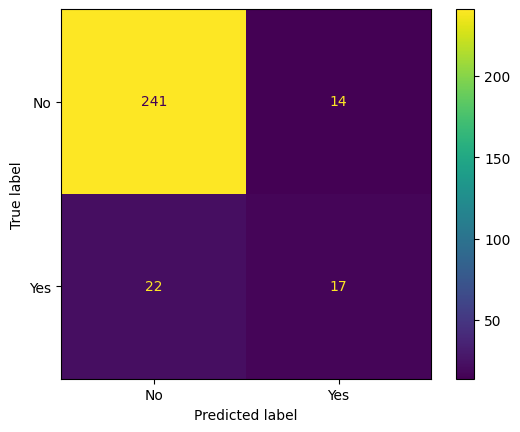

In [177]:
# Confusion Matrix for the best model accuracy
eval_result = evaluate_classification_metrics(y_test_encoded, models_class["Prediction"][0],
                                              target_names=["No","Yes"])

In [178]:
print(eval_result['Classification Report'])

              precision    recall  f1-score   support

          No       0.92      0.95      0.93       255
         Yes       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



##### test & train using minmax scaler

In [179]:
models_class_m = evaluate_classification_models(X_train_scaled_m, y_train_encoded, X_test_scaled_m, y_test_encoded, classification_models)
models_class_m

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
GaussianNB                  87.755102       83.673469  0.690498  0.485714   
LogisticRegression          82.993197       81.377551  0.695626  0.444444   
SVC                         84.013605       84.098639  0.614630  0.338028   
DecisionTreeClassifier      80.612245      100.000000  0.616742  0.329412   
KNeighborsClassifier        85.714286       87.670068  0.537557  0.160000   
RandomForestClassifier      86.394558      100.000000  0.530618  0.130435   

                          Recall  Precision  \
Model-Name                                    
GaussianNB              0.435897   0.548387   
LogisticRegression      0.512821   0.392157   
SVC                     0.307692   0.375000   
DecisionTreeClassifier  0.358974   0.304348   
KNeighborsClassifier    0.102564   0.363636   
RandomForestClassifier  0.076923   0.428571   

                                                               Prediction  
Model-Name                                                                 
GaussianNB              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
LogisticRegression      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
KNeighborsClassifier    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

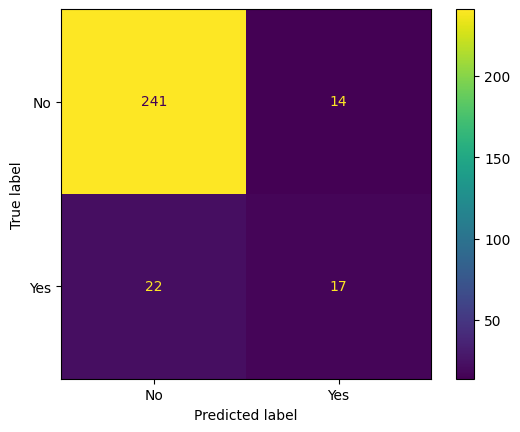

In [180]:
# Confusion Matrix for the best model accuracy
eval_result_m = evaluate_classification_metrics(y_test_encoded, models_class_m["Prediction"][0], target_names=["No","Yes"])

In [181]:
print(eval_result_m['Classification Report'])

              precision    recall  f1-score   support

          No       0.92      0.95      0.93       255
         Yes       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



##### train & test using robust scaler

In [182]:
models_class_r = evaluate_classification_models(X_train_scaled_r, y_train_encoded, X_test_scaled_r, y_test_encoded, classification_models)
models_class_r

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
GaussianNB                  87.755102       83.673469  0.690498  0.485714   
LogisticRegression          82.993197       81.972789  0.695626  0.444444   
SVC                         84.693878       84.693878  0.618552  0.347826   
DecisionTreeClassifier      79.931973      100.000000  0.591101  0.289157   
RandomForestClassifier      86.394558      100.000000  0.530618  0.130435   
KNeighborsClassifier        84.693878       87.414966  0.520814  0.117647   

                          Recall  Precision  \
Model-Name                                    
GaussianNB              0.435897   0.548387   
LogisticRegression      0.512821   0.392157   
SVC                     0.307692   0.400000   
DecisionTreeClassifier  0.307692   0.272727   
RandomForestClassifier  0.076923   0.428571   
KNeighborsClassifier    0.076923   0.250000   

                                                               Prediction  
Model-Name                                                                 
GaussianNB              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
LogisticRegression      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
KNeighborsClassifier    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...

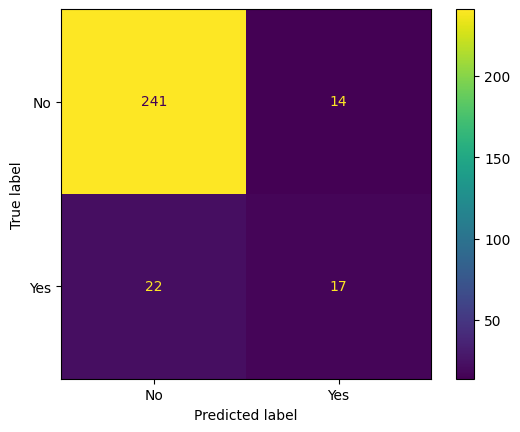

In [183]:
# Confusion Matrix for the best model accuracy
eval_result_r = evaluate_classification_metrics(y_test_encoded, models_class_r["Prediction"][0], target_names=["No","Yes"])

In [184]:
print(eval_result_r['Classification Report'])

              precision    recall  f1-score   support

          No       0.92      0.95      0.93       255
         Yes       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



## Plotting Models Performance

In [365]:
train_accuracy_1 = {
    'KNN with Standard Scaler': models_class["Train_Accuracy"]["KNeighborsClassifier"],
    'KNN with MinMax Scaler': models_class_m["Train_Accuracy"]["KNeighborsClassifier"],
    'KNN with Robust Scaler': models_class_r["Train_Accuracy"]["KNeighborsClassifier"],
    'Decision Tree with Standard Scaler': models_class["Train_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with MinMax Scaler': models_class_m["Train_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with Robust Scaler': models_class_r["Train_Accuracy"]["DecisionTreeClassifier"],
    'Random Forest with Standard Scaler': models_class["Train_Accuracy"]["RandomForestClassifier"],
    'Random Forest with MinMax Scaler': models_class_m["Train_Accuracy"]["RandomForestClassifier"],
    'Random Forest with Robust Scaler': models_class_r["Train_Accuracy"]["RandomForestClassifier"],
    'Logistic Regression with Standard Scaler': models_class["Train_Accuracy"]["LogisticRegression"],
    'Logistic Regression with MinMax Scaler': models_class_m["Train_Accuracy"]["LogisticRegression"],
    'Logistic Regression with Robust Scaler': models_class_r["Train_Accuracy"]["LogisticRegression"],
    'SVC with Standard Scaler': models_class["Train_Accuracy"]["SVC"],
    'SVC with MinMax Scaler': models_class_m["Train_Accuracy"]["SVC"],
    'SVC with Robust Scaler': models_class_r["Train_Accuracy"]["SVC"],
    'Naive Bayes with Standard Scaler': models_class["Train_Accuracy"]["GaussianNB"],
    'Naive Bayes with MinMax Scaler': models_class_m["Train_Accuracy"]["GaussianNB"],
    'Naive Bayes with Robust Scaler': models_class_r["Train_Accuracy"]["GaussianNB"]

}

test_accuracy_1 = {
    'KNN with Standard Scaler': models_class["Test_Accuracy"]["KNeighborsClassifier"],
    'KNN with MinMax Scaler': models_class_m["Test_Accuracy"]["KNeighborsClassifier"],
    'KNN with Robust Scaler': models_class_r["Test_Accuracy"]["KNeighborsClassifier"],
    'Decision Tree with Standard Scaler': models_class["Test_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with MinMax Scaler': models_class_m["Test_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with Robust Scaler': models_class_r["Test_Accuracy"]["DecisionTreeClassifier"],
    'Random Forest with Standard Scaler': models_class["Test_Accuracy"]["RandomForestClassifier"],
    'Random Forest with MinMax Scaler': models_class_m["Test_Accuracy"]["RandomForestClassifier"],
    'Random Forest with Robust Scaler': models_class_r["Test_Accuracy"]["RandomForestClassifier"],
    'Logistic Regression with Standard Scaler': models_class["Test_Accuracy"]["LogisticRegression"],
    'Logistic Regression with MinMax Scaler': models_class_m["Test_Accuracy"]["LogisticRegression"],
    'Logistic Regression with Robust Scaler': models_class_r["Test_Accuracy"]["LogisticRegression"],
    'SVC with Standard Scaler': models_class["Test_Accuracy"]["SVC"],
    'SVC with MinMax Scaler': models_class_m["Test_Accuracy"]["SVC"],
    'SVC with Robust Scaler': models_class_r["Test_Accuracy"]["SVC"],
    'Naive Bayes with Standard Scaler': models_class["Test_Accuracy"]["GaussianNB"],
    'Naive Bayes with MinMax Scaler': models_class_m["Test_Accuracy"]["GaussianNB"],
    'Naive Bayes with Robust Scaler': models_class_r["Test_Accuracy"]["GaussianNB"]
}

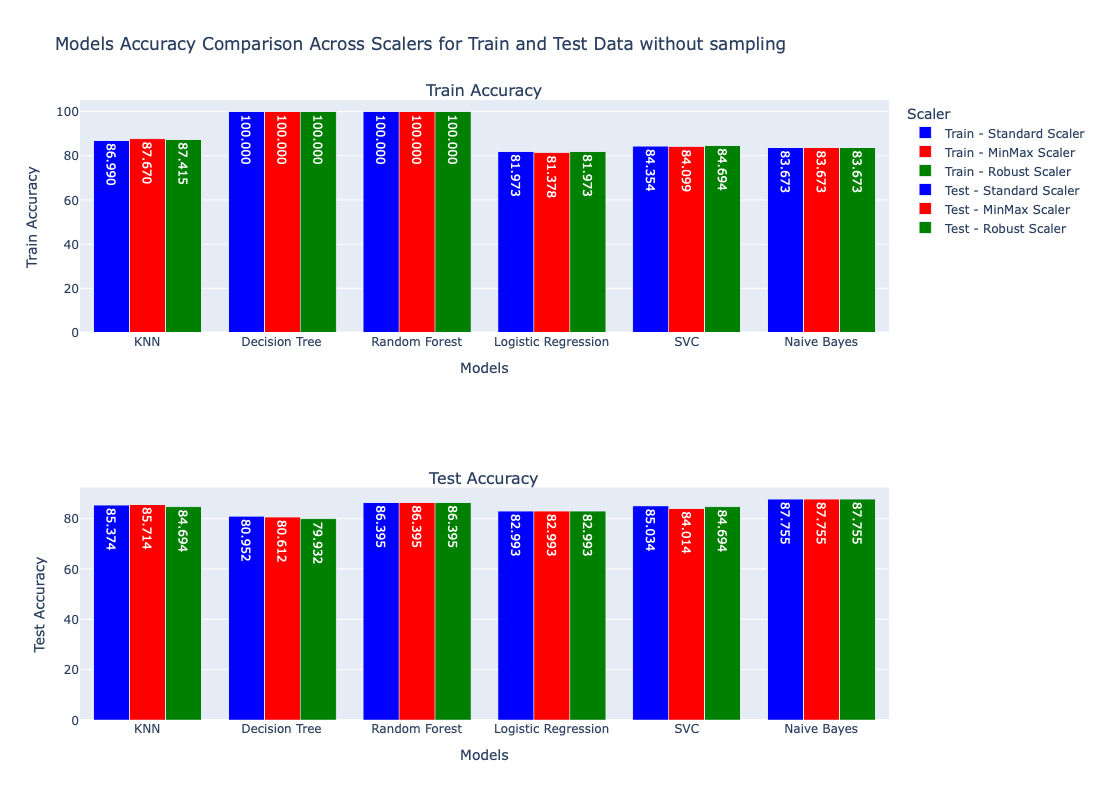

In [376]:
# Models and Scalers
models = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'SVC', 'Naive Bayes']
scalers = ['Standard Scaler', 'MinMax Scaler', 'Robust Scaler']
colors = ['blue', 'red', 'green']  # Corresponding colors for the scalers

# Create subplots: 1 row and 2 columns
fig = make_subplots(rows=2, cols=1, subplot_titles=("Train Accuracy", "Test Accuracy"))

# Add Train Accuracy bars
for scaler, color in zip(scalers, colors):
    fig.add_trace(go.Bar(
        x=models,
        y=[train_accuracy_1[f'{model} with {scaler}'] for model in models],
        name=f'Train - {scaler}',
        marker_color=color,
        text=[f"{train_accuracy_1[f'{model} with {scaler}']:.3f}" for model in models],
        textposition='auto'
    ), row=1, col=1)

# Add Test Accuracy bars
for scaler, color in zip(scalers, colors):
    fig.add_trace(go.Bar(
        x=models,
        y=[test_accuracy_1[f'{model} with {scaler}'] for model in models],
        name=f'Test - {scaler}',
        marker_color=color,
        text=[f"{test_accuracy_1[f'{model} with {scaler}']:.3f}" for model in models],
        textposition='auto'
    ), row=2, col=1)

# Update layout to organize the subplots
fig.update_layout(
    title_text='Models Accuracy Comparison Across Scalers for Train and Test Data without sampling',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    barmode='group',
    height=800,
    width=1100,
    legend_title_text='Scaler',
    showlegend=True  # Ensure the legend shows up only once
)

# Update specific layout for each subplot
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=2, col=1)
fig.update_yaxes(title_text="Train Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Test Accuracy", row=2, col=1)

# Show plot
fig.show()

## Imbalancing data

In [377]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [378]:
df_model.head()

Age Attrition     BusinessTravel  JobInvolvement                JobRole  \
0   41       Yes      Travel_Rarely               3        Sales Executive   
1   49        No  Travel_Frequently               2     Research Scientist   
2   37       Yes      Travel_Rarely               2  Laboratory Technician   
3   33        No  Travel_Frequently               3     Research Scientist   
4   27        No      Travel_Rarely               3  Laboratory Technician   

   MonthlyIncome MaritalStatus  StockOptionLevel  TotalWorkingYears  \
0           5993        Single                 0                  8   
1           5130       Married                 1                 10   
2           2090        Single                 0                  7   
3           2909       Married                 0                  8   
4           3468       Married                 1                  6   

   Satisfaction  EmployeeExperience OverTime  
0          0.65                 2.2      Yes  
1          0.70                 3.6       No  
2          0.80                 0.0      Yes  
3          0.85                 2.2      Yes  
4          0.50                 1.0       No

In [379]:
X_s = df_model.drop(['Attrition'], axis=1)
y_s = df_model[['Attrition']]

In [380]:
X_s.head()

Age     BusinessTravel  JobInvolvement                JobRole  \
0   41      Travel_Rarely               3        Sales Executive   
1   49  Travel_Frequently               2     Research Scientist   
2   37      Travel_Rarely               2  Laboratory Technician   
3   33  Travel_Frequently               3     Research Scientist   
4   27      Travel_Rarely               3  Laboratory Technician   

   MonthlyIncome MaritalStatus  StockOptionLevel  TotalWorkingYears  \
0           5993        Single                 0                  8   
1           5130       Married                 1                 10   
2           2090        Single                 0                  7   
3           2909       Married                 0                  8   
4           3468       Married                 1                  6   

   Satisfaction  EmployeeExperience OverTime  
0          0.65                 2.2      Yes  
1          0.70                 3.6       No  
2          0.80                 0.0      Yes  
3          0.85                 2.2      Yes  
4          0.50                 1.0       No

#### Encoding data

In [381]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_s, y, test_size=0.2, random_state=42)

In [382]:
X_train_o, X_test_o = encode_data(X_train_o, X_test_o, encoder_type="label")

In [383]:
y_train_o, y_test_o = encode_target(y_train_o, y_test_o)

In [384]:
X_train_o.shape

(1176, 11)

In [385]:
y_test_o.shape

(294,)

In [386]:
# Our classification models:
models = [
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    GaussianNB(),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
]

#### OverSampling

In [387]:
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_train_o, y_train_o)
print("Before Smoote" , y.value_counts())
print("After Smoote" , y_oversampled.value_counts())

Before Smoote Attrition
No     1233
Yes     237
Name: count, dtype: int64
After Smoote 0    978
1    978
Name: count, dtype: int64


##### test & train using standard scaler & oversampling

In [388]:
X_sc_oversampled, X_test_sc_o = scale_data(X_oversampled, X_test_o, scaler_type="standard", columns=scaled_cols)

In [389]:
models_over = evaluate_classification_models(X_sc_oversampled, y_oversampled, X_test_sc_o, y_test_o, models)
models_over

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.911565       78.169734  0.748115  0.465517   
SVC                         76.190476       77.709611  0.678130  0.385965   
RandomForestClassifier      81.632653      100.000000  0.633484  0.357143   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        69.727891       88.139059  0.586576  0.276423   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.350649   
SVC                     0.564103   0.293333   
RandomForestClassifier  0.384615   0.333333   
GaussianNB              0.692308   0.236842   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.435897   0.202381   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

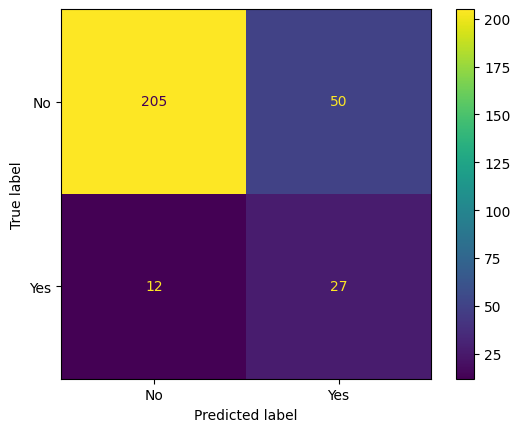

In [390]:
# Confusion Matrix for the best model accuracy
eval_over = evaluate_classification_metrics(y_test_o, models_over["Prediction"][0],
                                              target_names=["No","Yes"])

In [391]:
print(eval_over['Classification Report'])

              precision    recall  f1-score   support

          No       0.94      0.80      0.87       255
         Yes       0.35      0.69      0.47        39

    accuracy                           0.79       294
   macro avg       0.65      0.75      0.67       294
weighted avg       0.87      0.79      0.82       294



##### test & train using minmax scaler & oversampling

In [392]:
X_mm_oversampled, X_test_mm_o = scale_data(X_oversampled, X_test_o, scaler_type="minmax", columns=scaled_cols)

In [393]:
models_mm_over = evaluate_classification_models(X_mm_oversampled, y_oversampled, X_test_mm_o, y_test_o, models)
models_mm_over

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.571429       78.169734  0.746154  0.461538   
SVC                         75.850340       76.891616  0.687029  0.393162   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
RandomForestClassifier      81.292517      100.000000  0.631523  0.352941   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        70.748299       87.525562  0.581599  0.271186   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.346154   
SVC                     0.589744   0.294872   
GaussianNB              0.692308   0.236842   
RandomForestClassifier  0.384615   0.326087   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.410256   0.202532   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

##### test & train using robust scaler & oversampling

In [394]:
X_rob_oversampled, X_test_rob_o = scale_data(X_oversampled, X_test_o, scaler_type="robust", columns=scaled_cols)

In [395]:
models_rob_over = evaluate_classification_models(X_rob_oversampled, y_oversampled, X_test_rob_o, y_test_o, models)
models_rob_over

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.911565       78.169734  0.748115  0.465517   
SVC                         75.850340       77.658487  0.676169  0.382609   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
RandomForestClassifier      80.952381      100.000000  0.629563  0.348837   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        69.387755       88.190184  0.573756  0.262295   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.350649   
SVC                     0.564103   0.289474   
GaussianNB              0.692308   0.236842   
RandomForestClassifier  0.384615   0.319149   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.410256   0.192771   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

#### UnderSampling

In [396]:
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = smote.fit_resample(X_train_o, y_train_o)
print("Before Smoote" , y.value_counts())
print("After Smoote" ,"\n", y_undersampled.value_counts())

Before Smoote Attrition
No     1233
Yes     237
Name: count, dtype: int64
After Smoote 
 0    978
1    978
Name: count, dtype: int64


##### test & train using standard scaler & undersampling

In [397]:
X_sc_undersampled, X_test_sc_u = scale_data(X_undersampled, X_test_o, scaler_type="standard", columns=scaled_cols)

In [398]:
models_under = evaluate_classification_models(X_sc_undersampled, y_undersampled, X_test_sc_u, y_test_o, models)
models_under

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.911565       78.169734  0.748115  0.465517   
SVC                         76.190476       77.709611  0.678130  0.385965   
RandomForestClassifier      81.632653      100.000000  0.633484  0.357143   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        69.727891       88.139059  0.586576  0.276423   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.350649   
SVC                     0.564103   0.293333   
RandomForestClassifier  0.384615   0.333333   
GaussianNB              0.692308   0.236842   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.435897   0.202381   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

##### test & train using minmax scaler & undersampling

In [399]:
X_mm_undersampled, X_test_mm_u = scale_data(X_undersampled, X_test_o, scaler_type="minmax", columns=scaled_cols)

In [400]:
models_mm_under = evaluate_classification_models(X_mm_undersampled, y_undersampled, X_test_mm_u, y_test_o, models)
models_mm_under

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.571429       78.169734  0.746154  0.461538   
SVC                         75.850340       76.891616  0.687029  0.393162   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
RandomForestClassifier      81.292517      100.000000  0.631523  0.352941   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        70.748299       87.525562  0.581599  0.271186   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.346154   
SVC                     0.589744   0.294872   
GaussianNB              0.692308   0.236842   
RandomForestClassifier  0.384615   0.326087   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.410256   0.202532   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

##### test & train using robust scaler & undersampling

In [401]:
X_rob_undersampled, X_test_rob_u = scale_data(X_undersampled, X_test_o, scaler_type="robust", columns=scaled_cols)

In [402]:
models_rob_under = evaluate_classification_models(X_rob_undersampled, y_undersampled, X_test_rob_u, y_test_o, models)
models_rob_under

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.911565       78.169734  0.748115  0.465517   
SVC                         75.850340       77.658487  0.676169  0.382609   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
RandomForestClassifier      80.952381      100.000000  0.629563  0.348837   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        69.387755       88.190184  0.573756  0.262295   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.350649   
SVC                     0.564103   0.289474   
GaussianNB              0.692308   0.236842   
RandomForestClassifier  0.384615   0.319149   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.410256   0.192771   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

#### Combination of Under and Over Sampling

In [403]:
smote_enn = SMOTEENN(random_state=42)
X_combsampled, y_combsampled = smote.fit_resample(X_train_o, y_train_o)
print("Before Smoote" , y.value_counts(), "\n")
print("After Smoote","\n", y_combsampled.value_counts())

Before Smoote Attrition
No     1233
Yes     237
Name: count, dtype: int64 

After Smoote 
 0    978
1    978
Name: count, dtype: int64


##### test & train using standard scaler and Combination Sampling

In [404]:
X_sc_combsampled, X_test_sc_c = scale_data(X_combsampled, X_test_o, scaler_type="standard", columns=scaled_cols)

In [405]:
models_comb = evaluate_classification_models(X_sc_combsampled, y_combsampled, X_test_sc_c, y_test_o, models)
models_comb

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.911565       78.169734  0.748115  0.465517   
SVC                         76.190476       77.709611  0.678130  0.385965   
RandomForestClassifier      81.632653      100.000000  0.633484  0.357143   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        69.727891       88.139059  0.586576  0.276423   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.350649   
SVC                     0.564103   0.293333   
RandomForestClassifier  0.384615   0.333333   
GaussianNB              0.692308   0.236842   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.435897   0.202381   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

##### test & train using minmax scaler and Combination Sampling

In [406]:
X_mm_combsampled, X_test_mm_c = scale_data(X_combsampled, X_test_o, scaler_type="minmax", columns=scaled_cols)

In [407]:
models_mm_comb = evaluate_classification_models(X_mm_combsampled, y_combsampled, X_test_mm_c, y_test_o, models)
models_mm_comb

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.571429       78.169734  0.746154  0.461538   
SVC                         75.850340       76.891616  0.687029  0.393162   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
RandomForestClassifier      81.292517      100.000000  0.631523  0.352941   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        70.748299       87.525562  0.581599  0.271186   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.346154   
SVC                     0.589744   0.294872   
GaussianNB              0.692308   0.236842   
RandomForestClassifier  0.384615   0.326087   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.410256   0.202532   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

##### test & train using robust scaler and Combination Sampling

In [408]:
X_rob_combsampled, X_test_rob_c = scale_data(X_combsampled, X_test_o, scaler_type="robust", columns=scaled_cols)

In [409]:
models_rob_comb = evaluate_classification_models(X_rob_combsampled, y_combsampled, X_test_rob_c, y_test_o, models)
models_rob_comb

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                  
LogisticRegression          78.911565       78.169734  0.748115  0.465517   
SVC                         75.850340       77.658487  0.676169  0.382609   
GaussianNB                  66.326531       72.034765  0.675566  0.352941   
RandomForestClassifier      80.952381      100.000000  0.629563  0.348837   
DecisionTreeClassifier      76.190476      100.000000  0.612971  0.313725   
KNeighborsClassifier        69.387755       88.190184  0.573756  0.262295   

                          Recall  Precision  \
Model-Name                                    
LogisticRegression      0.692308   0.350649   
SVC                     0.564103   0.289474   
GaussianNB              0.692308   0.236842   
RandomForestClassifier  0.384615   0.319149   
DecisionTreeClassifier  0.410256   0.253968   
KNeighborsClassifier    0.410256   0.192771   

                                                               Prediction  
Model-Name                                                                 
LogisticRegression      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...  
GaussianNB              [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
RandomForestClassifier  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
DecisionTreeClassifier  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...  
KNeighborsClassifier    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...

## Plotting Models Performance with Over, Under and Comb Sampling

In [410]:
train_accuracy_over = {
    'KNN with Standard Scaler': models_over["Train_Accuracy"]["KNeighborsClassifier"],
    'KNN with MinMax Scaler': models_mm_over["Train_Accuracy"]["KNeighborsClassifier"],
    'KNN with Robust Scaler': models_rob_over["Train_Accuracy"]["KNeighborsClassifier"],
    'Decision Tree with Standard Scaler': models_over["Train_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with MinMax Scaler': models_mm_over["Train_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with Robust Scaler': models_rob_over["Train_Accuracy"]["DecisionTreeClassifier"],
    'Random Forest with Standard Scaler': models_over["Train_Accuracy"]["RandomForestClassifier"],
    'Random Forest with MinMax Scaler': models_mm_over["Train_Accuracy"]["RandomForestClassifier"],
    'Random Forest with Robust Scaler': models_rob_over["Train_Accuracy"]["RandomForestClassifier"],
    'Logistic Regression with Standard Scaler': models_over["Train_Accuracy"]["LogisticRegression"],
    'Logistic Regression with MinMax Scaler': models_mm_over["Train_Accuracy"]["LogisticRegression"],
    'Logistic Regression with Robust Scaler': models_rob_over["Train_Accuracy"]["LogisticRegression"],
    'SVC with Standard Scaler': models_over["Train_Accuracy"]["SVC"],
    'SVC with MinMax Scaler': models_mm_over["Train_Accuracy"]["SVC"],
    'SVC with Robust Scaler': models_rob_over["Train_Accuracy"]["SVC"],
    'Naive Bayes with Standard Scaler': models_over["Train_Accuracy"]["GaussianNB"],
    'Naive Bayes with MinMax Scaler': models_mm_over["Train_Accuracy"]["GaussianNB"],
    'Naive Bayes with Robust Scaler': models_rob_over["Train_Accuracy"]["GaussianNB"]

}

test_accuracy_over = {
    'KNN with Standard Scaler': models_over["Test_Accuracy"]["KNeighborsClassifier"],
    'KNN with MinMax Scaler': models_mm_over["Test_Accuracy"]["KNeighborsClassifier"],
    'KNN with Robust Scaler': models_rob_over["Test_Accuracy"]["KNeighborsClassifier"],
    'Decision Tree with Standard Scaler': models_over["Test_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with MinMax Scaler': models_mm_over["Test_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with Robust Scaler': models_rob_over["Test_Accuracy"]["DecisionTreeClassifier"],
    'Random Forest with Standard Scaler': models_over["Test_Accuracy"]["RandomForestClassifier"],
    'Random Forest with MinMax Scaler': models_mm_over["Test_Accuracy"]["RandomForestClassifier"],
    'Random Forest with Robust Scaler': models_rob_over["Test_Accuracy"]["RandomForestClassifier"],
    'Logistic Regression with Standard Scaler': models_over["Test_Accuracy"]["LogisticRegression"],
    'Logistic Regression with MinMax Scaler': models_mm_over["Test_Accuracy"]["LogisticRegression"],
    'Logistic Regression with Robust Scaler': models_rob_over["Test_Accuracy"]["LogisticRegression"],
    'SVC with Standard Scaler': models_over["Test_Accuracy"]["SVC"],
    'SVC with MinMax Scaler': models_mm_over["Test_Accuracy"]["SVC"],
    'SVC with Robust Scaler': models_rob_over["Test_Accuracy"]["SVC"],
    'Naive Bayes with Standard Scaler': models_over["Test_Accuracy"]["GaussianNB"],
    'Naive Bayes with MinMax Scaler': models_mm_over["Test_Accuracy"]["GaussianNB"],
    'Naive Bayes with Robust Scaler': models_rob_over["Test_Accuracy"]["GaussianNB"]
}

In [412]:
train_accuracy_under = {
    'KNN with Standard Scaler': models_under["Train_Accuracy"]["KNeighborsClassifier"],
    'KNN with MinMax Scaler': models_mm_under["Train_Accuracy"]["KNeighborsClassifier"],
    'KNN with Robust Scaler': models_rob_under["Train_Accuracy"]["KNeighborsClassifier"],
    'Decision Tree with Standard Scaler': models_under["Train_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with MinMax Scaler': models_mm_under["Train_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with Robust Scaler': models_rob_under["Train_Accuracy"]["DecisionTreeClassifier"],
    'Random Forest with Standard Scaler': models_under["Train_Accuracy"]["RandomForestClassifier"],
    'Random Forest with MinMax Scaler': models_mm_under["Train_Accuracy"]["RandomForestClassifier"],
    'Random Forest with Robust Scaler': models_rob_under["Train_Accuracy"]["RandomForestClassifier"],
    'Logistic Regression with Standard Scaler': models_under["Train_Accuracy"]["LogisticRegression"],
    'Logistic Regression with MinMax Scaler': models_mm_under["Train_Accuracy"]["LogisticRegression"],
    'Logistic Regression with Robust Scaler': models_rob_under["Train_Accuracy"]["LogisticRegression"],
    'SVC with Standard Scaler': models_under["Train_Accuracy"]["SVC"],
    'SVC with MinMax Scaler': models_mm_under["Train_Accuracy"]["SVC"],
    'SVC with Robust Scaler': models_rob_under["Train_Accuracy"]["SVC"],
    'Naive Bayes with Standard Scaler': models_under["Train_Accuracy"]["GaussianNB"],
    'Naive Bayes with MinMax Scaler': models_mm_under["Train_Accuracy"]["GaussianNB"],
    'Naive Bayes with Robust Scaler': models_rob_under["Train_Accuracy"]["GaussianNB"]

}

test_accuracy_under = {
    'KNN with Standard Scaler': models_under["Test_Accuracy"]["KNeighborsClassifier"],
    'KNN with MinMax Scaler': models_mm_under["Test_Accuracy"]["KNeighborsClassifier"],
    'KNN with Robust Scaler': models_rob_under["Test_Accuracy"]["KNeighborsClassifier"],
    'Decision Tree with Standard Scaler': models_under["Test_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with MinMax Scaler': models_mm_under["Test_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with Robust Scaler': models_rob_under["Test_Accuracy"]["DecisionTreeClassifier"],
    'Random Forest with Standard Scaler': models_under["Test_Accuracy"]["RandomForestClassifier"],
    'Random Forest with MinMax Scaler': models_mm_under["Test_Accuracy"]["RandomForestClassifier"],
    'Random Forest with Robust Scaler': models_rob_under["Test_Accuracy"]["RandomForestClassifier"],
    'Logistic Regression with Standard Scaler': models_under["Test_Accuracy"]["LogisticRegression"],
    'Logistic Regression with MinMax Scaler': models_mm_under["Test_Accuracy"]["LogisticRegression"],
    'Logistic Regression with Robust Scaler': models_rob_under["Test_Accuracy"]["LogisticRegression"],
    'SVC with Standard Scaler': models_under["Test_Accuracy"]["SVC"],
    'SVC with MinMax Scaler': models_mm_under["Test_Accuracy"]["SVC"],
    'SVC with Robust Scaler': models_rob_under["Test_Accuracy"]["SVC"],
    'Naive Bayes with Standard Scaler': models_under["Test_Accuracy"]["GaussianNB"],
    'Naive Bayes with MinMax Scaler': models_mm_under["Test_Accuracy"]["GaussianNB"],
    'Naive Bayes with Robust Scaler': models_rob_under["Test_Accuracy"]["GaussianNB"]
}

In [413]:
train_accuracy_comb = {
    'KNN with Standard Scaler': models_comb["Train_Accuracy"]["KNeighborsClassifier"],
    'KNN with MinMax Scaler': models_mm_comb["Train_Accuracy"]["KNeighborsClassifier"],
    'KNN with Robust Scaler': models_rob_comb["Train_Accuracy"]["KNeighborsClassifier"],
    'Decision Tree with Standard Scaler': models_comb["Train_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with MinMax Scaler': models_mm_comb["Train_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with Robust Scaler': models_rob_comb["Train_Accuracy"]["DecisionTreeClassifier"],
    'Random Forest with Standard Scaler': models_comb["Train_Accuracy"]["RandomForestClassifier"],
    'Random Forest with MinMax Scaler': models_mm_comb["Train_Accuracy"]["RandomForestClassifier"],
    'Random Forest with Robust Scaler': models_rob_comb["Train_Accuracy"]["RandomForestClassifier"],
    'Logistic Regression with Standard Scaler': models_comb["Train_Accuracy"]["LogisticRegression"],
    'Logistic Regression with MinMax Scaler': models_mm_comb["Train_Accuracy"]["LogisticRegression"],
    'Logistic Regression with Robust Scaler': models_rob_comb["Train_Accuracy"]["LogisticRegression"],
    'SVC with Standard Scaler': models_comb["Train_Accuracy"]["SVC"],
    'SVC with MinMax Scaler': models_mm_comb["Train_Accuracy"]["SVC"],
    'SVC with Robust Scaler': models_rob_comb["Train_Accuracy"]["SVC"],
    'Naive Bayes with Standard Scaler': models_comb["Train_Accuracy"]["GaussianNB"],
    'Naive Bayes with MinMax Scaler': models_mm_comb["Train_Accuracy"]["GaussianNB"],
    'Naive Bayes with Robust Scaler': models_rob_comb["Train_Accuracy"]["GaussianNB"]

}

test_accuracy_comb = {
    'KNN with Standard Scaler': models_comb["Test_Accuracy"]["KNeighborsClassifier"],
    'KNN with MinMax Scaler': models_mm_comb["Test_Accuracy"]["KNeighborsClassifier"],
    'KNN with Robust Scaler': models_rob_comb["Test_Accuracy"]["KNeighborsClassifier"],
    'Decision Tree with Standard Scaler': models_comb["Test_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with MinMax Scaler': models_mm_comb["Test_Accuracy"]["DecisionTreeClassifier"],
    'Decision Tree with Robust Scaler': models_rob_comb["Test_Accuracy"]["DecisionTreeClassifier"],
    'Random Forest with Standard Scaler': models_comb["Test_Accuracy"]["RandomForestClassifier"],
    'Random Forest with MinMax Scaler': models_mm_comb["Test_Accuracy"]["RandomForestClassifier"],
    'Random Forest with Robust Scaler': models_rob_comb["Test_Accuracy"]["RandomForestClassifier"],
    'Logistic Regression with Standard Scaler': models_comb["Test_Accuracy"]["LogisticRegression"],
    'Logistic Regression with MinMax Scaler': models_mm_comb["Test_Accuracy"]["LogisticRegression"],
    'Logistic Regression with Robust Scaler': models_rob_comb["Test_Accuracy"]["LogisticRegression"],
    'SVC with Standard Scaler': models_comb["Test_Accuracy"]["SVC"],
    'SVC with MinMax Scaler': models_mm_comb["Test_Accuracy"]["SVC"],
    'SVC with Robust Scaler': models_rob_comb["Test_Accuracy"]["SVC"],
    'Naive Bayes with Standard Scaler': models_comb["Test_Accuracy"]["GaussianNB"],
    'Naive Bayes with MinMax Scaler': models_mm_comb["Test_Accuracy"]["GaussianNB"],
    'Naive Bayes with Robust Scaler': models_rob_comb["Test_Accuracy"]["GaussianNB"]
}

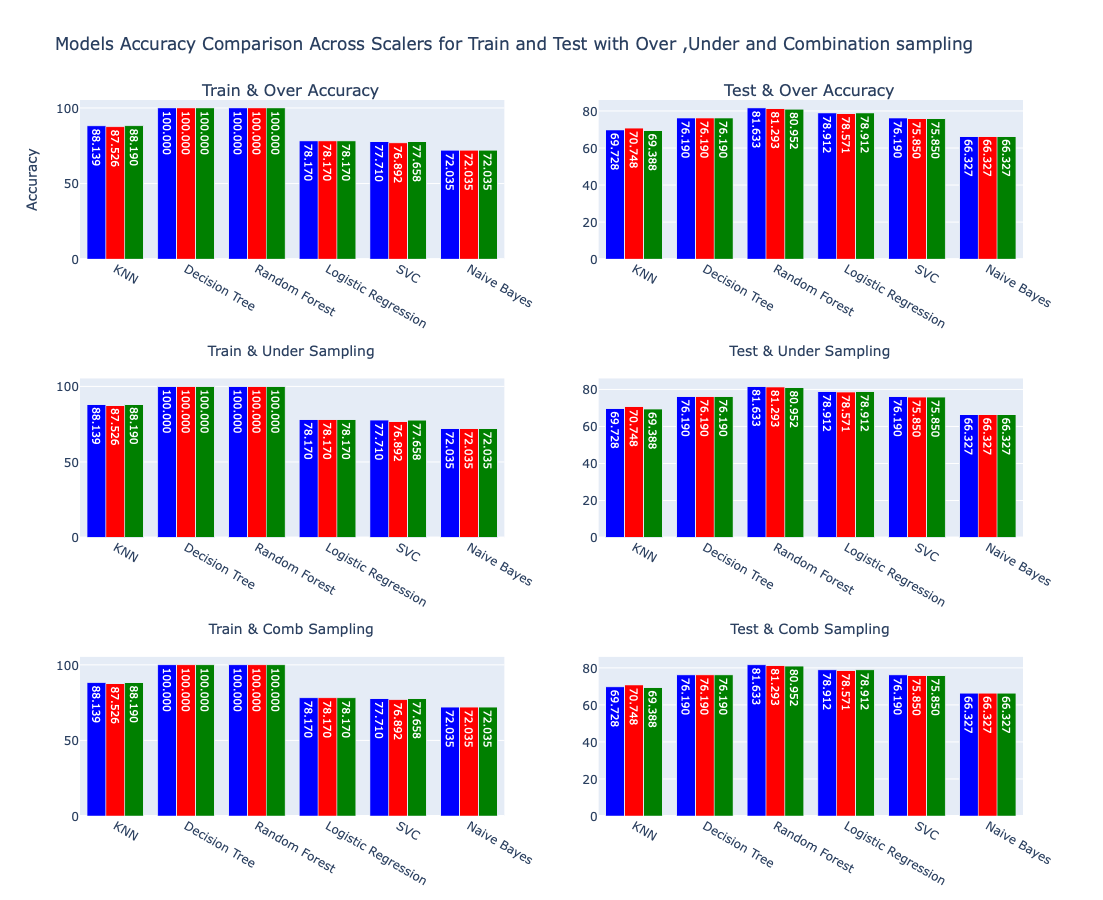

In [423]:
# Models and Scalers
models = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'SVC', 'Naive Bayes']
scalers = ['Standard Scaler', 'MinMax Scaler', 'Robust Scaler']
colors = ['blue', 'red', 'green']  # Corresponding colors for the scalers

# Create subplots: 1 row and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=("Train & Over Accuracy", "Test & Over Accuracy"))

# Add Train Accuracy bars with Over Sampling
for scaler, color in zip(scalers, colors):
    fig.add_trace(go.Bar(
        x=models,
        y=[train_accuracy_over[f'{model} with {scaler}'] for model in models],
        name=f'Train - {scaler}',
        marker_color=color,
        text=[f"{train_accuracy_over[f'{model} with {scaler}']:.3f}" for model in models],
        textposition='auto'
    ), row=1, col=1)

# Add Test Accuracy bars with over sampling
for scaler, color in zip(scalers, colors):
    fig.add_trace(go.Bar(
        x=models,
        y=[test_accuracy_over[f'{model} with {scaler}'] for model in models],
        name=f'Test - {scaler}',
        marker_color=color,
        text=[f"{test_accuracy_over[f'{model} with {scaler}']:.3f}" for model in models],
        textposition='auto'
    ), row=1, col=2)


# Add Train Accuracy bars with under sampling
for scaler, color in zip(scalers, colors):
    fig.add_trace(go.Bar(
        x=models,
        y=[train_accuracy_under[f'{model} with {scaler}'] for model in models],
        name=f'Train - {scaler}',
        marker_color=color,
        text=[f"{train_accuracy_under[f'{model} with {scaler}']:.3f}" for model in models],
        textposition='auto'
    ), row=2, col=1)

# Add Test Accuracy bars with under sampling
for scaler, color in zip(scalers, colors):
    fig.add_trace(go.Bar(
        x=models,
        y=[test_accuracy_under[f'{model} with {scaler}'] for model in models],
        name=f'Test - {scaler}',
        marker_color=color,
        text=[f"{test_accuracy_under[f'{model} with {scaler}']:.3f}" for model in models],
        textposition='auto'
    ), row=2, col=2)

# Add Train Accuracy bars with combination sampling
for scaler, color in zip(scalers, colors):
    fig.add_trace(go.Bar(
        x=models,
        y=[train_accuracy_comb[f'{model} with {scaler}'] for model in models],
        name=f'Train - {scaler}',
        marker_color=color,
        text=[f"{train_accuracy_comb[f'{model} with {scaler}']:.3f}" for model in models],
        textposition='auto'
    ), row=3, col=1)

# Add Test Accuracy bars with combination sampling
for scaler, color in zip(scalers, colors):
    fig.add_trace(go.Bar(
        x=models,
        y=[test_accuracy_comb[f'{model} with {scaler}'] for model in models],
        name=f'Test - {scaler}',
        marker_color=color,
        text=[f"{test_accuracy_comb[f'{model} with {scaler}']:.3f}" for model in models],
        textposition='auto'
    ), row=3, col=2)


# Update layout to organize the subplots
fig.update_layout(
    title_text='Models Accuracy Comparison Across Scalers for Train and Test with Over ,Under and Combination sampling',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    barmode='group',
    height=900,
    width=1100,
    # legend_title_text='Scaler',
    showlegend=False  # Ensure the legend shows up only once
)

# Update specific layout for each subplot
fig.update_xaxes(title_text="Train & Under Sampling", row=1, col=1)
fig.update_xaxes(title_text="Test & Under Sampling", row=1, col=2)
fig.update_xaxes(title_text="Train & Comb Sampling", row=2, col=1)
fig.update_xaxes(title_text="Test & Comb Sampling", row=2, col=2)


# Show plot
fig.show()

## Hyperparameter Tuning Models without smapling

In [316]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

In [301]:
classification_models

[LogisticRegression(class_weight={0: 1, 1: 3}, random_state=42),
 SVC(class_weight={0: 1, 1: 3}, random_state=42),
 GaussianNB(),
 RandomForestClassifier(class_weight='balanced', random_state=42),
 DecisionTreeClassifier(class_weight='balanced', random_state=42),
 KNeighborsClassifier()]

### DecisionTree Hyperparameter Tuning

In [323]:
# RandomizedSearchCV parameter grid
random_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [324]:
# Apply RandomizedSearchCV
dt = classification_models[4]

random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=random_grid,
                                   n_iter=3,  # Number of iterations
                                   cv=5,       # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring="accuracy")

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled_m, y_train_encoded)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Best score
print("Best cross-validation score:", random_search.best_score_)

# Best estimator
best_dt = random_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 33, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 13, 'splitter': 'random'}
Best cross-validation score: 0.6913306887847097


In [331]:
# Predict on the test set
y_pred = best_dt.predict(X_test_scaled_m)
y_train_pred = best_dt.predict(X_train_scaled_m)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test_encoded, y_pred)
accuracy_train_dt = accuracy_score(y_train_encoded, y_train_pred)

print("Train set accuracy", accuracy_train_dt)
print("Test set accuracy:", accuracy_dt)

Train set accuracy 0.7763605442176871
Test set accuracy: 0.6938775510204082


### RandomForest Hyperparameter Tuning

In [326]:
# RandomizedSearchCV parameter grid
random_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [327]:
# Apply RandomizedSearchCV
rf = classification_models[3]

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=random_grid,
                                   n_iter=3,  # Number of iterations
                                   cv=5,       # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring="accuracy")

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled_m, y_train_encoded)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Best score
print("Best cross-validation score:", random_search.best_score_)

# Best estimator
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 84, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 763}
Best cross-validation score: 0.8452073566534439


In [332]:
# Predict on the test set
y_pred = best_rf.predict(X_test_scaled_m)
y_train_pred = best_rf.predict(X_train_scaled_m)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test_encoded, y_pred)
accuracy_train_rf = accuracy_score(y_train_encoded, y_train_pred)

print("Train set accuracy", accuracy_train_rf)
print("Test set accuracy:", accuracy_rf)

Train set accuracy 0.939625850340136
Test set accuracy: 0.8299319727891157


### KNN Hyperparameter Tuning

In [333]:
# Define the hyperparameter distributions
param_dist = {
    'n_neighbors': range(1, 20),  # Number of neighbors to use, sampled from 1 to 20
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [334]:
knn = classification_models[5]

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn,
                                   param_distributions=param_dist,
                                   n_iter=3,
                                   cv=5,
                                   n_jobs=-1,
                                   random_state=42,
                                   scoring='accuracy')

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled_m, y_train_encoded)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Best score
print("Best cross-validation score:", random_search.best_score_)

# Best estimator
best_knn = random_search.best_estimator_

Best hyperparameters: {'weights': 'uniform', 'n_neighbors': 14, 'metric': 'minkowski', 'algorithm': 'auto'}
Best cross-validation score: 0.8375874504147133


In [335]:
# Predict on the test set
y_pred = best_knn.predict(X_test_scaled_m)
y_train_pred = best_knn.predict(X_train_scaled_m)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test_encoded, y_pred)
accuracy_train_knn = accuracy_score(y_train_encoded, y_train_pred)

print("Train set accuracy", accuracy_train_knn)
print("Test set accuracy:", accuracy_knn)

Train set accuracy 0.8486394557823129
Test set accuracy: 0.8639455782312925


## Plotting Models Performance

In [336]:
train_accuracy = {
    'KNN': accuracy_train_knn,
    'Decision Tree': accuracy_train_dt,
    'Random Forest': accuracy_train_rf
}

test_accuracy = {
    'KNN': accuracy_knn,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

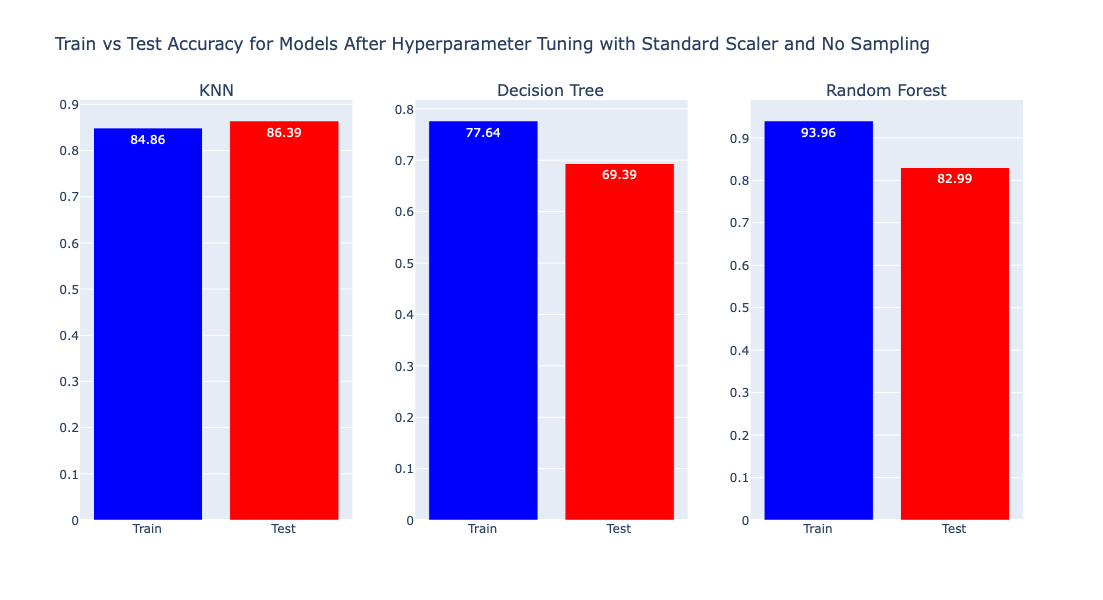

In [356]:
# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("KNN", "Decision Tree", "Random Forest"))

# Add train accuracy histograms
fig.add_trace(
    go.Bar(x=['Train'], y=[train_accuracy['KNN']], name='Train Accuracy', marker_color='blue', text=round((train_accuracy['KNN']*100),2)),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=['Train'], y=[train_accuracy['Decision Tree']], name='Train Accuracy', marker_color='blue', text=round((train_accuracy['Decision Tree']*100),2)),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=['Train'], y=[train_accuracy['Random Forest']], name='Train Accuracy', marker_color='blue', text=round((train_accuracy['Random Forest']*100),2)),
    row=1, col=3
)

# Add test accuracy histograms
fig.add_trace(
    go.Bar(x=['Test'], y=[test_accuracy['KNN']], name='Test Accuracy', marker_color='red', text=round((test_accuracy['KNN']*100),2)),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=['Test'], y=[test_accuracy['Decision Tree']], name='Test Accuracy', marker_color='red', text=round((test_accuracy['Decision Tree']*100),2)),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=['Test'], y=[test_accuracy['Random Forest']], name='Test Accuracy', marker_color='red', text=round((test_accuracy['Random Forest']*100),2)),
    row=1, col=3
)

# Update layout
fig.update_layout(
    title_text="Train vs Test Accuracy for Models After Hyperparameter Tuning with Standard Scaler and No Sampling",
    height=600, width=1100,
    showlegend=False
)

# Show plot
fig.show()

## Feature Importance

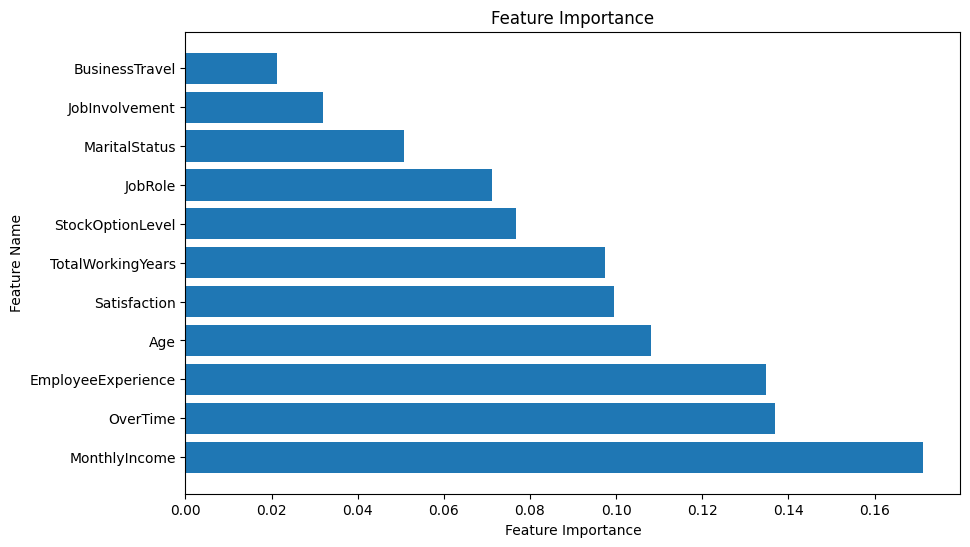

In [329]:
feature_importance = best_rf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

### LogisticRegression Hyperparameter Tuning

In [317]:
# RandomizedSearchCV parameter grid
random_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(0.001, 10),
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': randint(100, 1000),
    'l1_ratio': uniform(0, 1)  # only used if penalty is 'elasticnet'
}

In [ ]:
# Step 4: Apply RandomizedSearchCV
lr = classification_models[0]

random_search = RandomizedSearchCV(estimator=lr,
                                   param_distributions=random_grid,
                                   n_iter=2,  # Number of iterations
                                   cv=5,       # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring="accuracy")

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled_m, y_train_encoded)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Best score
print("Best cross-validation score:", random_search.best_score_)

# Best estimator
best_lr = random_search.best_estimator_

In [ ]:
# Predict on the test set
y_pred = best_lr.predict(X_test_scaled_m)
y_train_pred = best_lr.predict(X_train_scaled_m)

# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
accuracy_train = accuracy_score(y_train_encoded, y_train_pred)

print("Train set accuracy", accuracy_train)
print("Test set accuracy:", accuracy)

### NaiveBayes Hyperparameter Tuning

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

In [ ]:
NB_y_pred_train = NB.predict(X_train)
NB_y_pred = NB.predict(X_test)

In [ ]:
acc_train_NB = accuracy_score(NB_y_pred_train, y_train)
acc_NB = accuracy_score(NB_y_pred, y_test)
print(acc_train_NB)
print(acc_NB)

### SVC Hyperparameter Tuning

In [304]:
# RandomizedSearchCV parameter grid
random_grid = {
    'C': uniform(0.1, 10),        # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],   # Kernel type
    'gamma': uniform(0.01, 1),      # Kernel coefficient for 'rbf' kernel
    'class_weight': ["balanced", {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:5}]
}

In [ ]:
# Apply RandomizedSearchCV
svc = classification_models[1]

random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=3,  # Number of iterations
                                   cv=5,       # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring="accuracy")

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled_m, y_train_encoded)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Best score
print("Best cross-validation score:", random_search.best_score_)

# Best estimator
best_svc = random_search.best_estimator_

In [ ]:
# Predict on the test set
y_pred = best_svc.predict(X_test_scaled_m)
y_train_pred = best_svc.predict(X_train_scaled_m)

# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
accuracy_train = accuracy_score(y_train_encoded, y_train_pred)

print("Train set accuracy", accuracy_train)
print("Test set accuracy:", accuracy)